In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#loading dataset
df = pd.read_excel(r'D:\Purity\DataGlacier Internship\group_project\Healthcare_dataset.xlsx')
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [3]:
# dataframe shape
print(df.shape)
# checking for duplicates
print(df.Ptid.unique().shape)

(3424, 69)
(3424,)


In [4]:
# checking for missing variables
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

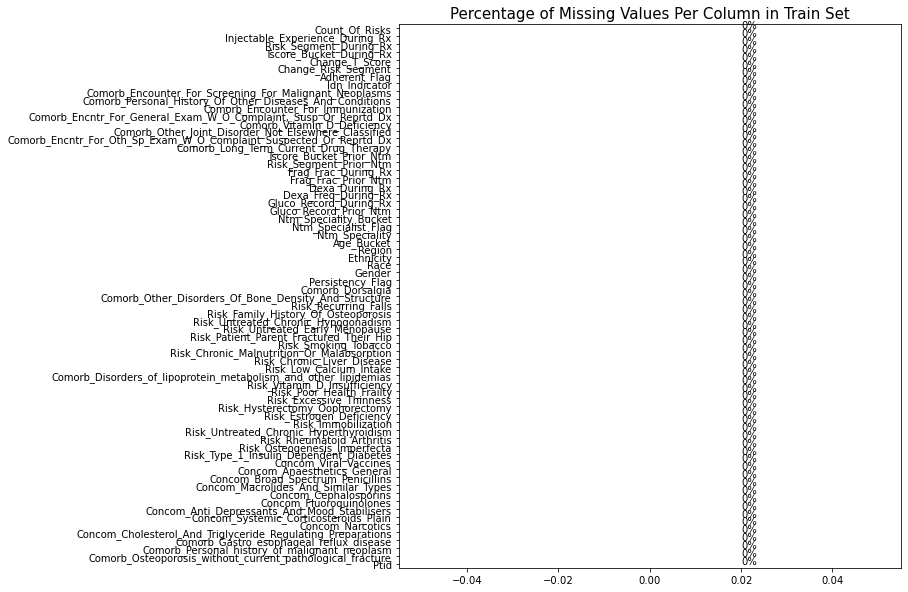

In [5]:
# Check if there any missing values 
ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [6]:
# dropping id column
df.drop(['Ptid'], axis=1, inplace=True)
df.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1


In [7]:
#getting variable dtypes
df.dtypes

Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
Region                            object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 68, dtype: object

In [8]:
cat_cols = list(df.select_dtypes(['object']).columns)
print(len(cat_cols))
cat_cols

66


['Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure'

In [9]:
num_cols = list(df.select_dtypes(['int64']).columns)
print(len(num_cols))
num_cols

2


['Dexa_Freq_During_Rx', 'Count_Of_Risks']

In [10]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


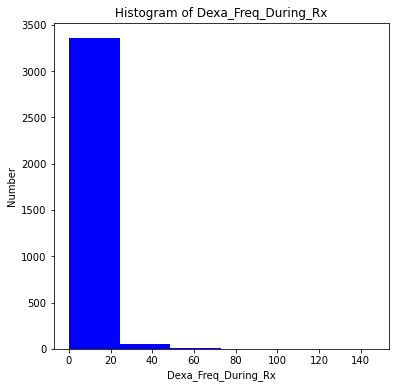

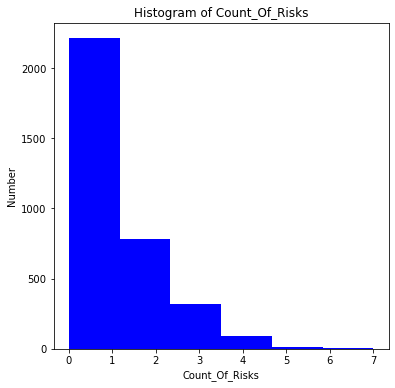

In [11]:
# ploting histogram for numerical columns
def plot_histogram(df, cols, bins=6):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax= fig.gca()
        df[col].plot.hist(ax = ax, bins = bins, color = 'blue')
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number')
        plt.show()
plot_histogram(df, num_cols)

In [12]:
# measuring skewness and kurtosis of numerical columns
def measure_skew_kurtosis(cols):
    for col in cols:
        print(col)
        result = df[[col]].agg(['skew', 'kurtosis']).transpose()
        print(result)
measure_skew_kurtosis(num_cols)

Dexa_Freq_During_Rx
                        skew   kurtosis
Dexa_Freq_During_Rx  6.80873  74.758378
Count_Of_Risks
                    skew  kurtosis
Count_Of_Risks  0.879791  0.900486


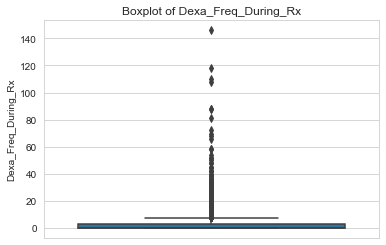

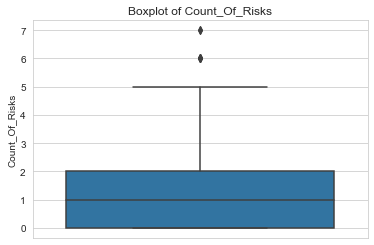

In [13]:
# creating a box plot of numerical columns to identify outliers
def boxplot(df, cols):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(y=col, data=df)
        plt.title('Boxplot of ' + col)
        plt.ylabel(col) #setting text for y axis
        plt.show()
boxplot(df, num_cols)

min_max_Dexa_Freq_During_Rx
                                skew   kurtosis
min_max_Dexa_Freq_During_Rx  6.80873  74.758378


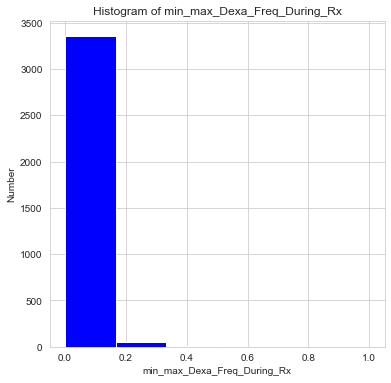

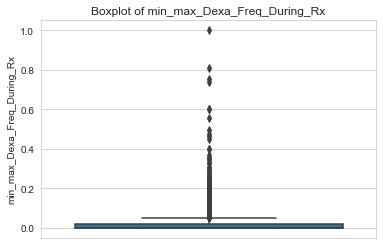

min_max_Count_Of_Risks
                            skew  kurtosis
min_max_Count_Of_Risks  0.879791  0.900486


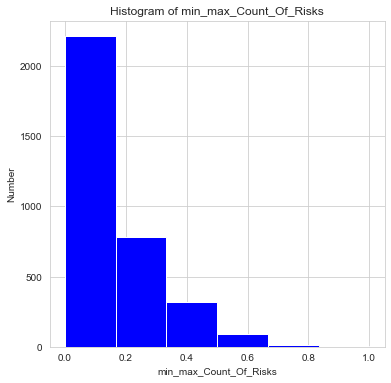

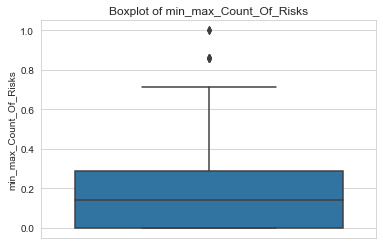

In [14]:
# min-max normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_min_max = df.copy() #getting a copy of dataframe
for col in num_cols:
    data = np.array(df_min_max[[col]])
    scaler.fit(data)#computing min and max to be used for scaling
    df['min_max_'+col] = scaler.transform(data) 
    measure_skew_kurtosis(['min_max_'+col]) #measure skewness and kurtosis
    plot_histogram(df, ['min_max_'+col])# plot histogram
    boxplot(df, ['min_max_'+col])#plot a box plot

sqrt_Dexa_Freq_During_Rx
                              skew  kurtosis
sqrt_Dexa_Freq_During_Rx  1.992495  4.734647


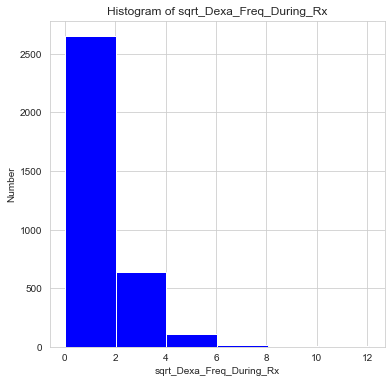

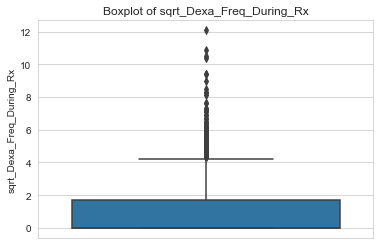

sqrt_Count_Of_Risks
                         skew  kurtosis
sqrt_Count_Of_Risks -0.327599 -1.038321


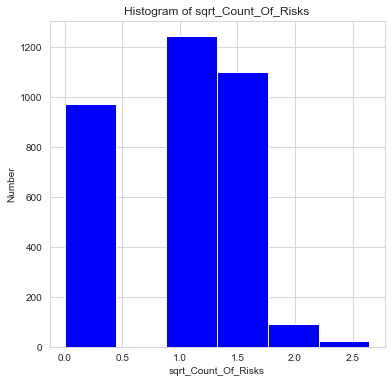

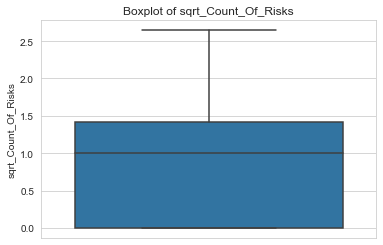

In [15]:
# square root transformation
for col in num_cols:
    df['sqrt_'+col] = np.sqrt(df[col])
    measure_skew_kurtosis(['sqrt_'+col]) #measure skewness and kurtosis
    plot_histogram(df, ['sqrt_'+col]) # plot histogram
    boxplot(df, ['sqrt_'+col])#plot a box plot

log_Dexa_Freq_During_Rx
                            skew  kurtosis
log_Dexa_Freq_During_Rx  1.40586   0.62457


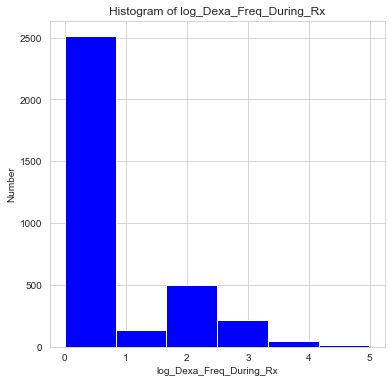

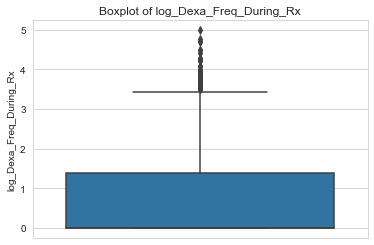

log_Count_Of_Risks
                        skew  kurtosis
log_Count_Of_Risks -0.091583 -1.006414


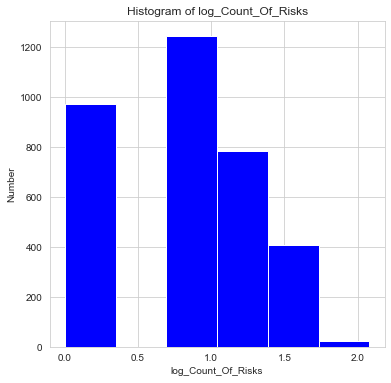

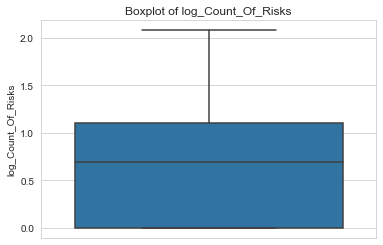

In [16]:
# log transformation
for col in num_cols:
    df['log_'+col] = np.log1p(df[col])
    measure_skew_kurtosis(['log_'+col]) #measure skewness and kurtosis
    plot_histogram(df, ['log_'+col]) # plot histogram
    boxplot(df, ['log_'+col])#plot a box plot

In [17]:
#summary of numerical columns
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks,min_max_Dexa_Freq_During_Rx,min_max_Count_Of_Risks,sqrt_Dexa_Freq_During_Rx,sqrt_Count_Of_Risks,log_Dexa_Freq_During_Rx,log_Count_Of_Risks
count,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000
mean,3.016063,1.239486,0.020658,0.177069,0.833369,0.914454,0.608034,0.685610
std,8.136545,1.094914,0.055730,0.156416,1.523889,0.635120,1.051456,0.499580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.142857,0.000000,1.000000,0.000000,0.693147
75%,3.000000,2.000000,0.020548,0.285714,1.732051,1.414214,1.386294,1.098612
max,146.000000,7.000000,1.000000,1.000000,12.083046,2.645751,4.990433,2.079442


In [18]:
# creating a new numerical list
num_cols = list(df.select_dtypes(['int64', 'float64']).columns)
print(len(num_cols))
num_cols

8


['Dexa_Freq_During_Rx',
 'Count_Of_Risks',
 'min_max_Dexa_Freq_During_Rx',
 'min_max_Count_Of_Risks',
 'sqrt_Dexa_Freq_During_Rx',
 'sqrt_Count_Of_Risks',
 'log_Dexa_Freq_During_Rx',
 'log_Count_Of_Risks']

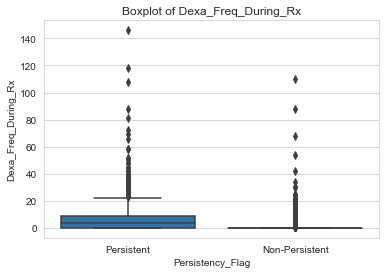

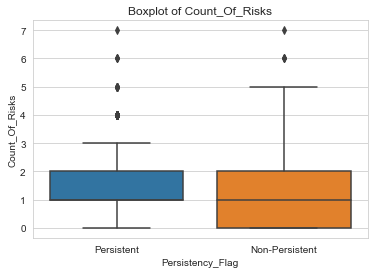

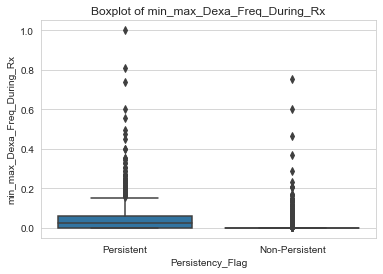

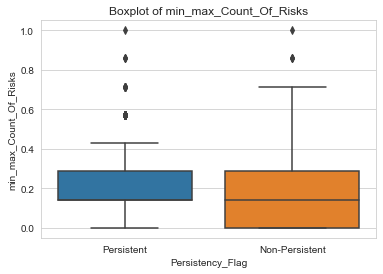

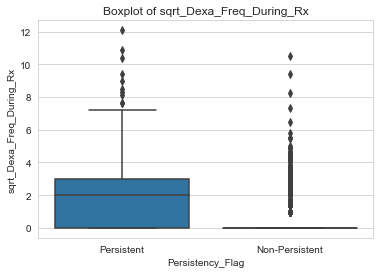

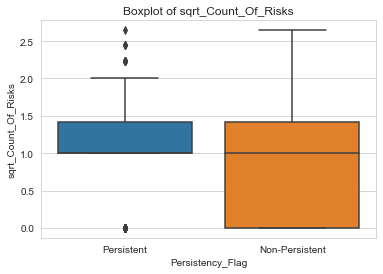

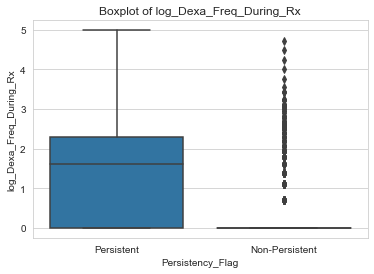

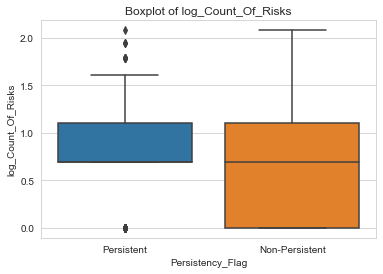

In [19]:
# creating a box plot of numerical columns against persitency flag to identify outliers
def boxplot(df, cols):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(x='Persistency_Flag', y=col, data=df)
        plt.title('Boxplot of ' + col)
        plt.ylabel(col) #setting text for y axis
        plt.show()
boxplot(df, num_cols)

EDA

1. Qualitative Analysis

In [20]:
#checking for number of values in categorical columns
df[cat_cols].nunique()

Persistency_Flag                  2
Gender                            2
Race                              4
Ethnicity                         3
Region                            5
                                 ..
Risk_Excessive_Thinness           2
Risk_Hysterectomy_Oophorectomy    2
Risk_Estrogen_Deficiency          2
Risk_Immobilization               2
Risk_Recurring_Falls              2
Length: 66, dtype: int64

In [21]:
# value counts for categorical variables
def count_value(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())
count_value(df, cat_cols)


For column Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

For column Gender
Female    3230
Male       194
Name: Gender, dtype: int64

For column Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64

For column Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64

For column Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64

For column Age_Bucket
>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64

For column Ntm_Speciality
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                          

Persistency_Flag


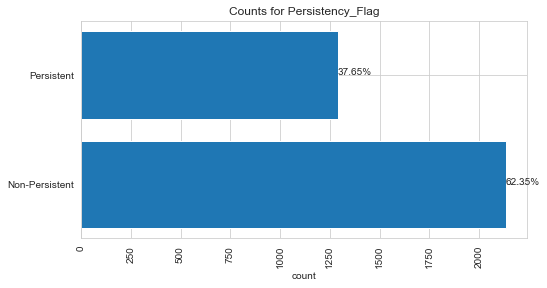

Gender


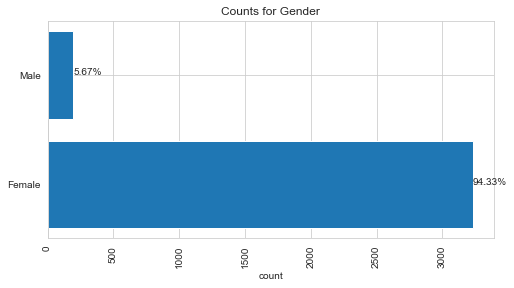

Race


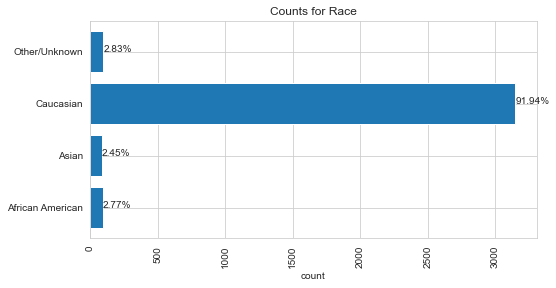

Ethnicity


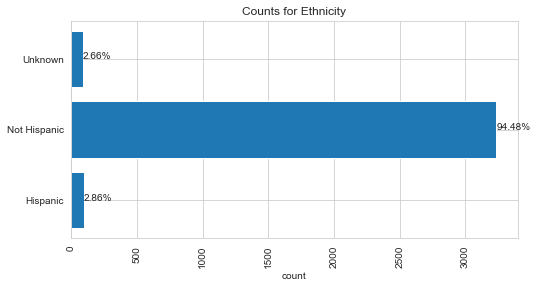

Region


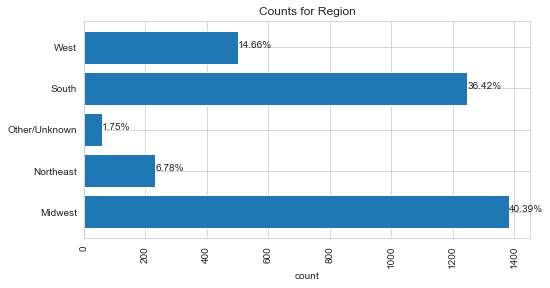

Age_Bucket


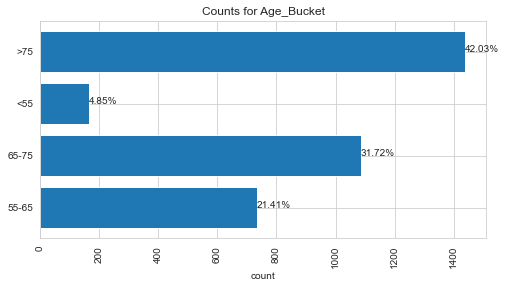

Ntm_Speciality


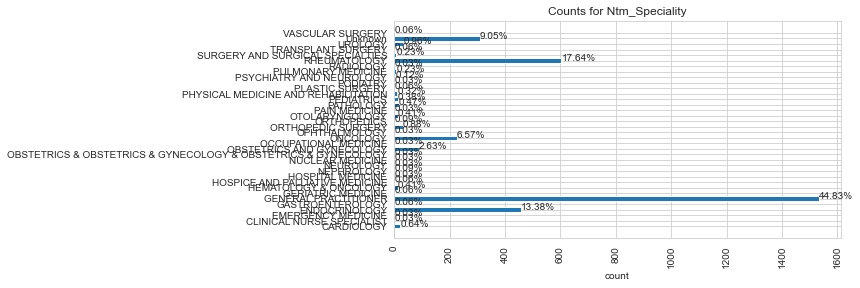

Ntm_Specialist_Flag


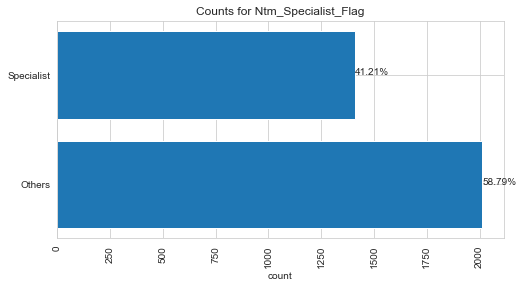

Ntm_Speciality_Bucket


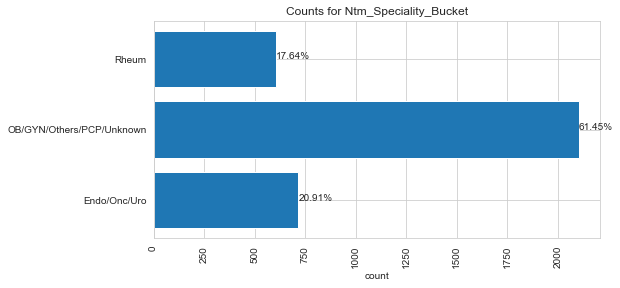

Gluco_Record_Prior_Ntm


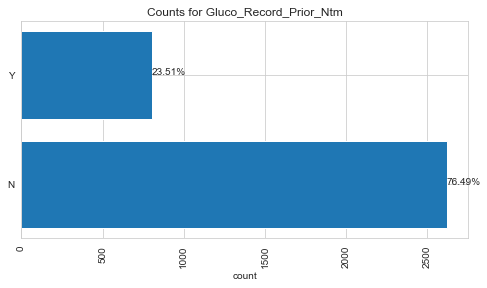

Gluco_Record_During_Rx


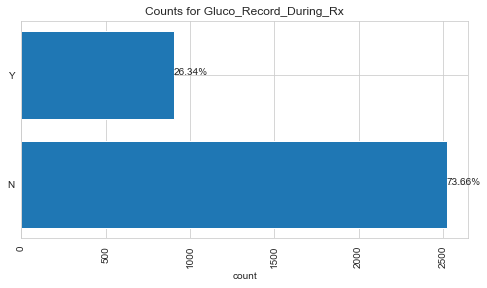

Dexa_During_Rx


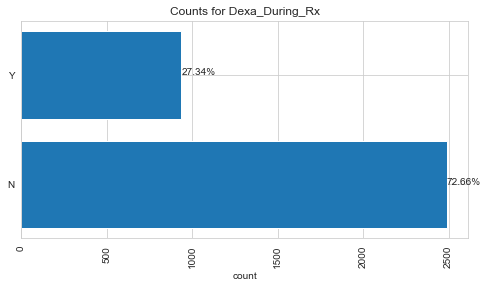

Frag_Frac_Prior_Ntm


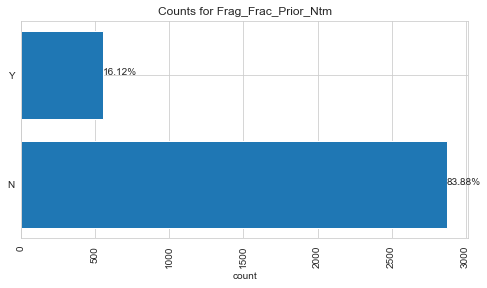

Frag_Frac_During_Rx


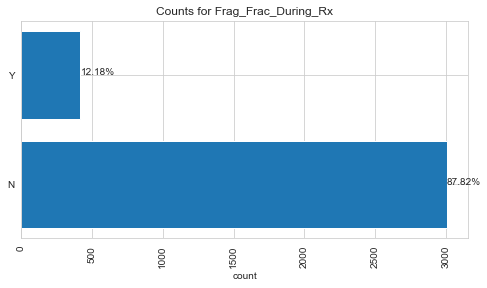

Risk_Segment_Prior_Ntm


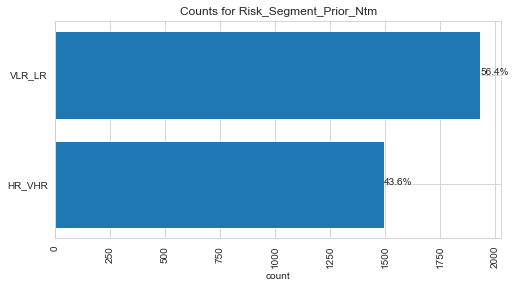

Tscore_Bucket_Prior_Ntm


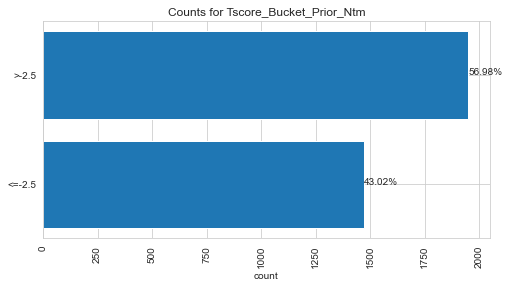

Risk_Segment_During_Rx


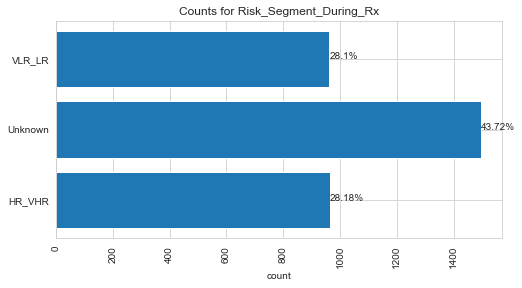

Tscore_Bucket_During_Rx


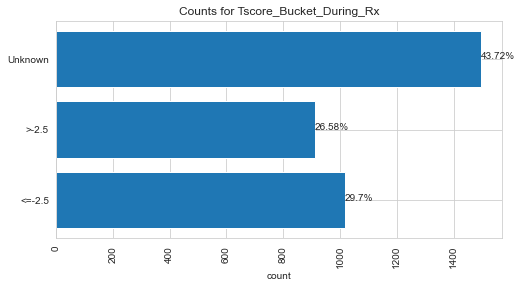

Change_T_Score


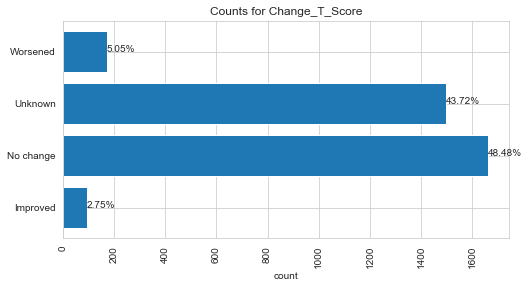

Change_Risk_Segment


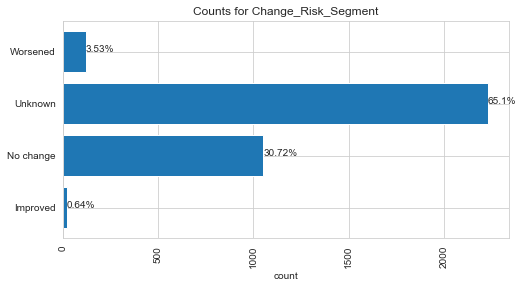

Adherent_Flag


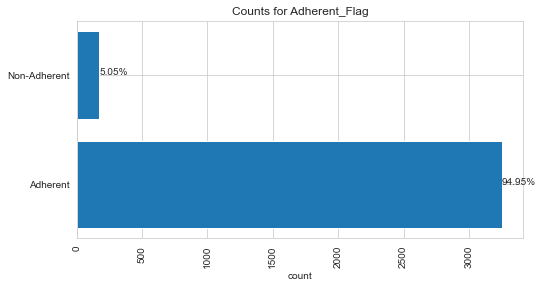

Idn_Indicator


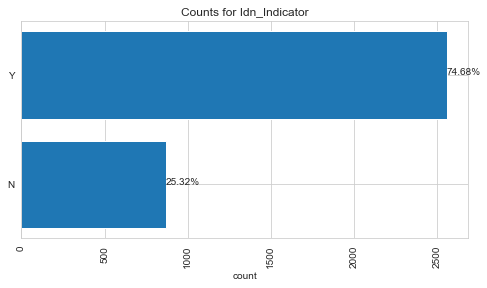

Injectable_Experience_During_Rx


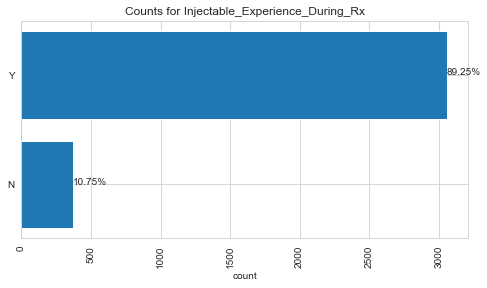

Comorb_Encounter_For_Screening_For_Malignant_Neoplasms


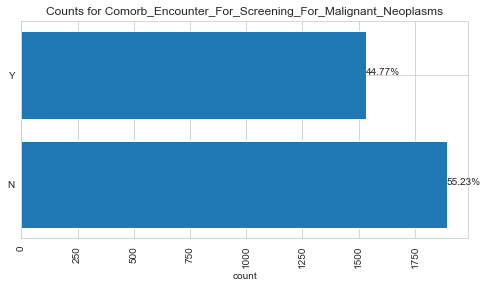

Comorb_Encounter_For_Immunization


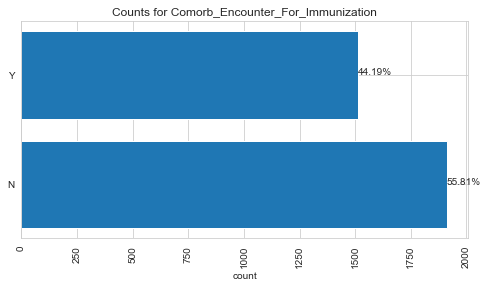

Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx


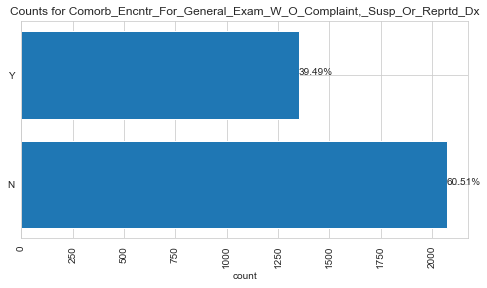

Comorb_Vitamin_D_Deficiency


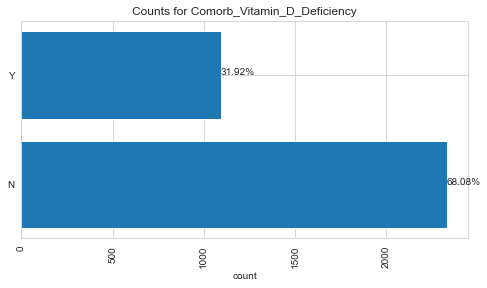

Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified


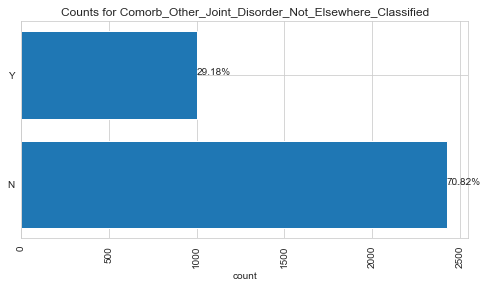

Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx


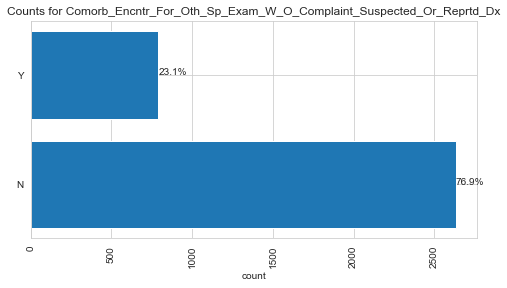

Comorb_Long_Term_Current_Drug_Therapy


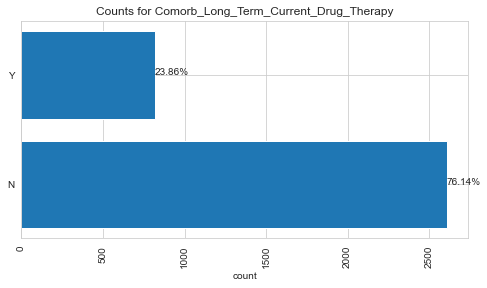

Comorb_Dorsalgia


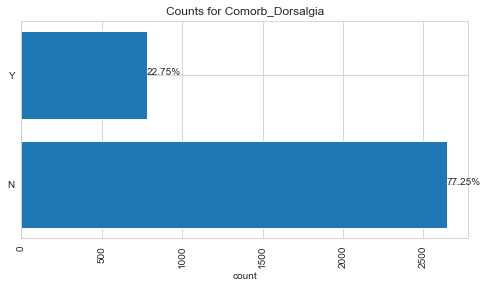

Comorb_Personal_History_Of_Other_Diseases_And_Conditions


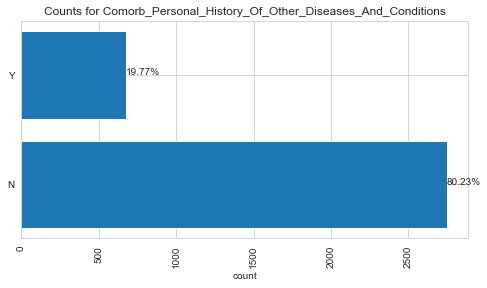

Comorb_Other_Disorders_Of_Bone_Density_And_Structure


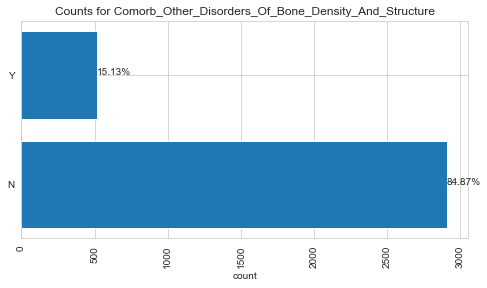

Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias


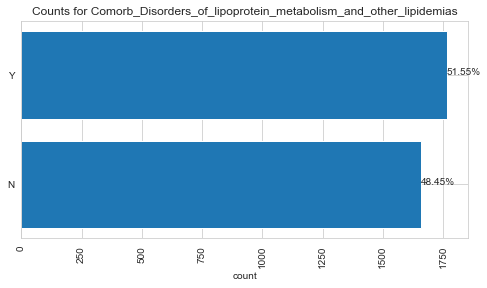

Comorb_Osteoporosis_without_current_pathological_fracture


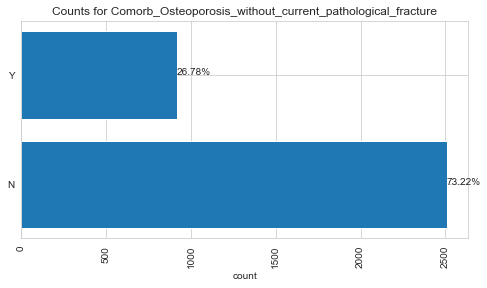

Comorb_Personal_history_of_malignant_neoplasm


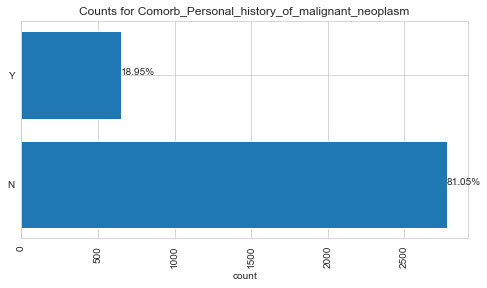

Comorb_Gastro_esophageal_reflux_disease


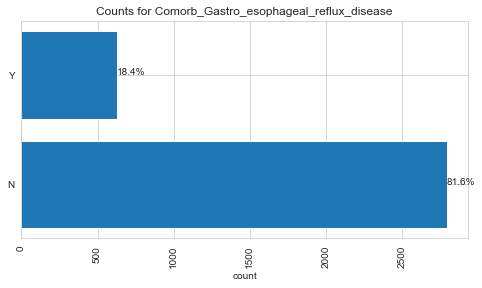

Concom_Cholesterol_And_Triglyceride_Regulating_Preparations


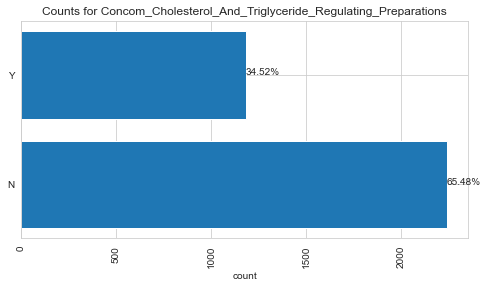

Concom_Narcotics


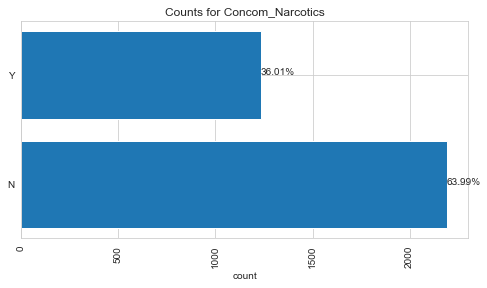

Concom_Systemic_Corticosteroids_Plain


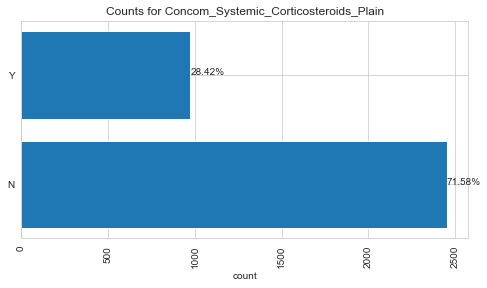

Concom_Anti_Depressants_And_Mood_Stabilisers


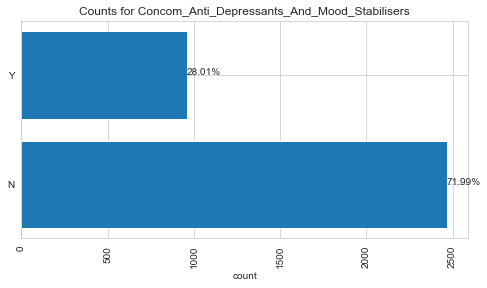

Concom_Fluoroquinolones


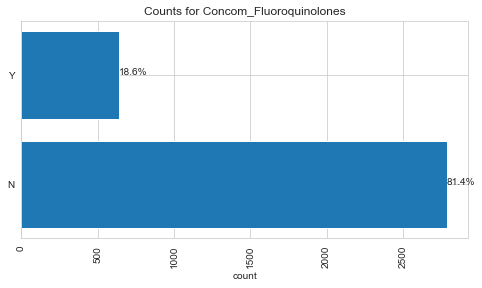

Concom_Cephalosporins


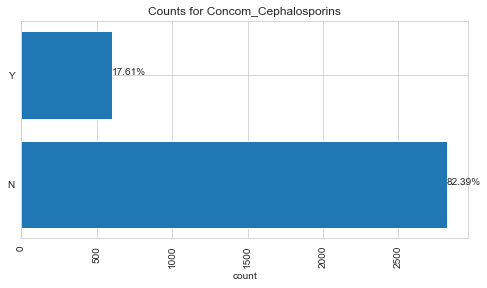

Concom_Macrolides_And_Similar_Types


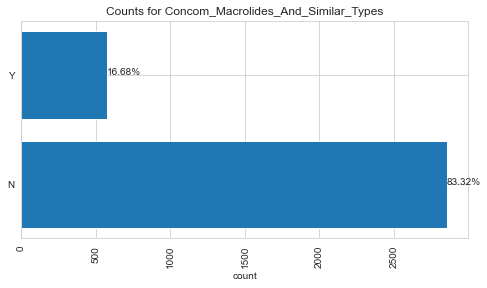

Concom_Broad_Spectrum_Penicillins


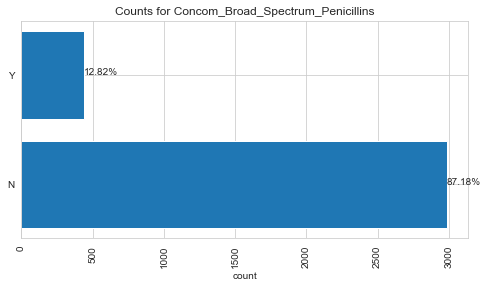

Concom_Anaesthetics_General


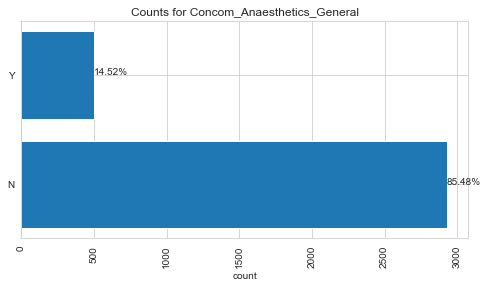

Concom_Viral_Vaccines


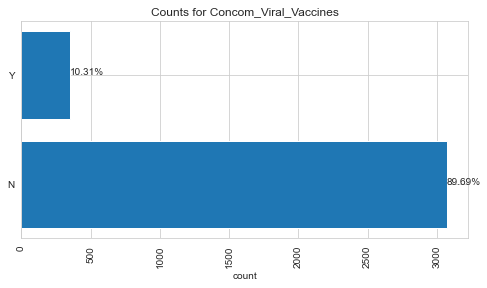

Risk_Type_1_Insulin_Dependent_Diabetes


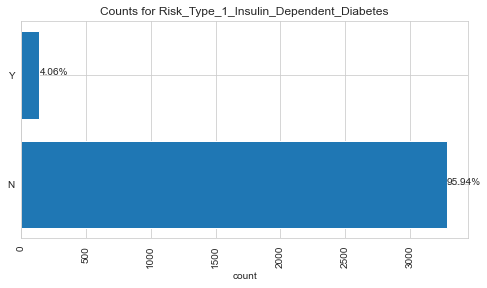

Risk_Osteogenesis_Imperfecta


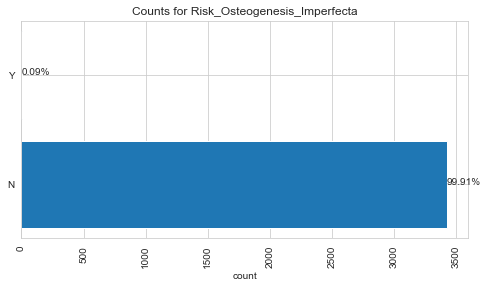

Risk_Rheumatoid_Arthritis


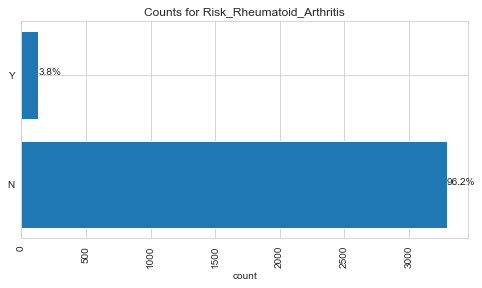

Risk_Untreated_Chronic_Hyperthyroidism


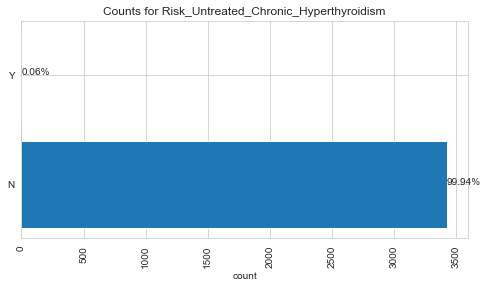

Risk_Untreated_Chronic_Hypogonadism


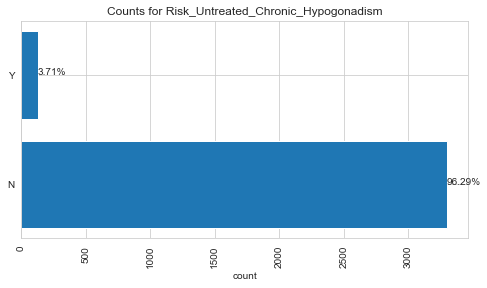

Risk_Untreated_Early_Menopause


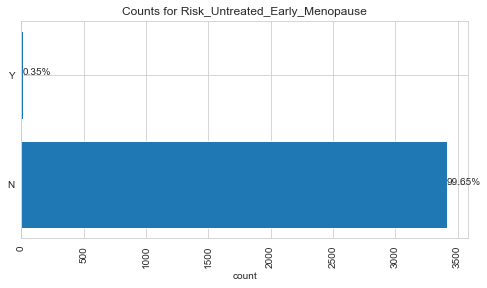

Risk_Patient_Parent_Fractured_Their_Hip


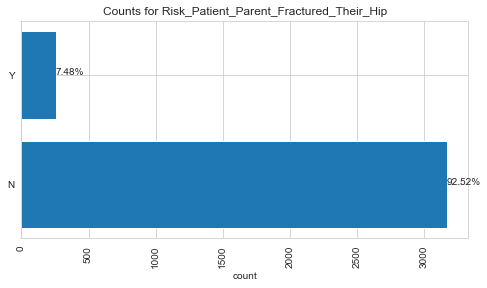

Risk_Smoking_Tobacco


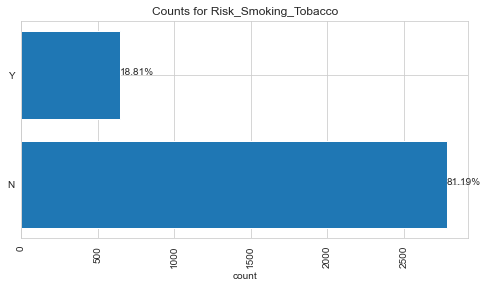

Risk_Chronic_Malnutrition_Or_Malabsorption


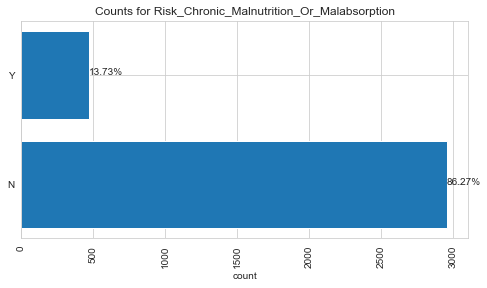

Risk_Chronic_Liver_Disease


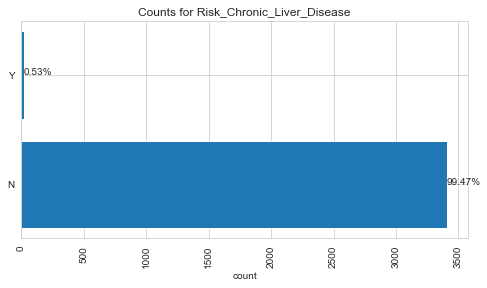

Risk_Family_History_Of_Osteoporosis


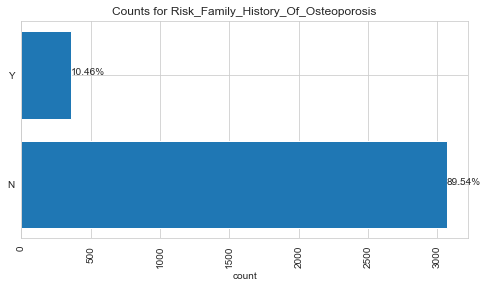

Risk_Low_Calcium_Intake


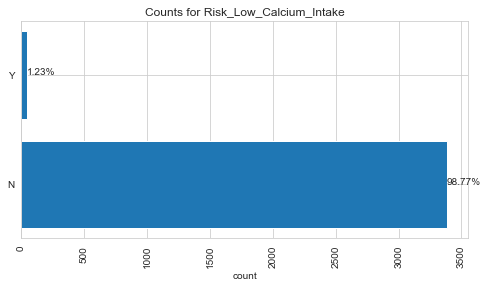

Risk_Vitamin_D_Insufficiency


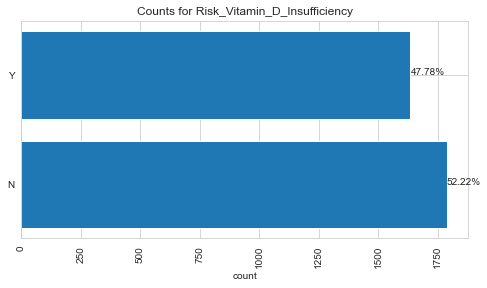

Risk_Poor_Health_Frailty


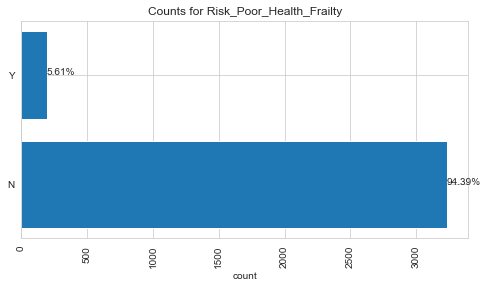

Risk_Excessive_Thinness


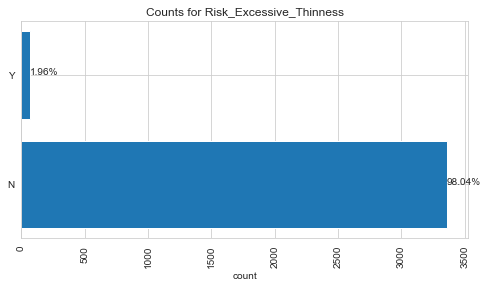

Risk_Hysterectomy_Oophorectomy


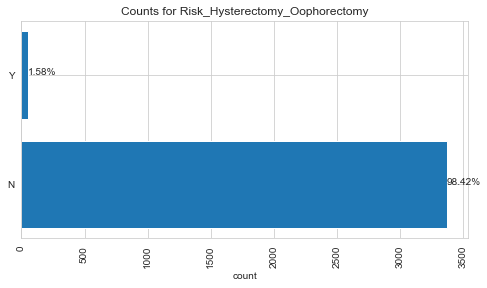

Risk_Estrogen_Deficiency


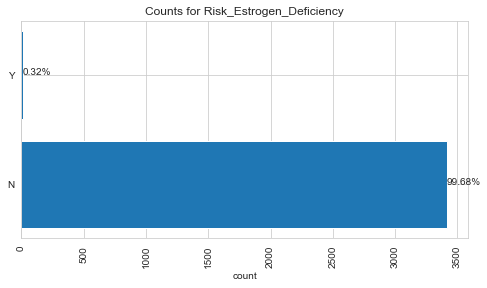

Risk_Immobilization


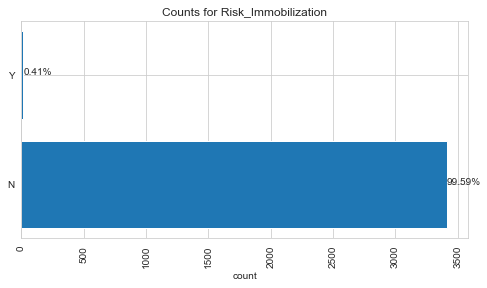

Risk_Recurring_Falls


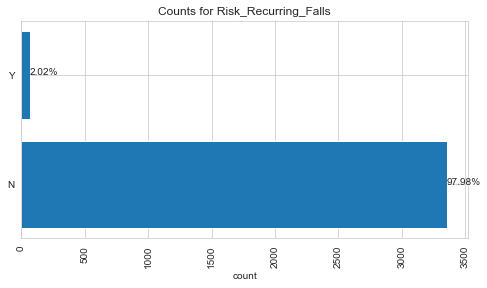

In [22]:
#bar graph for value counts for categorical columns
def plot_catcols(x, df):
    df['dummy'] = np.ones(shape = df.shape[0])
    for col in x:
        print(col)
        counts = df[['dummy', col]].groupby([col], as_index = False).count()
        fig, ax = plt.subplots(figsize = (8,4))
        graph = plt.barh(counts[col], counts.dummy) #creating a graph
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col)
        plt.xlabel('count')
        #getting percentages
        total = counts['dummy'].sum()
        percentage = []
        for i in range(counts.shape[0]):
            pct = (counts.dummy[i]/total)*100
            percentage.append(round(pct, 2))
        counts['Percentage'] = percentage
        # plotting the graph with percentages
        i = 0
        for p in graph:
            pct = f'{percentage[i]}%'
            width1, height1 =p.get_width(),p.get_height()
            x1 =p.get_x()+width1
            y1=p.get_y()+height1/2
            ax.annotate(pct,(x1,y1))
            i+=1
        plt.show()
plot_catcols(cat_cols, df)

In [23]:
# removing persistency flag form categorical columns
cat_cols.remove('Persistency_Flag')

In [24]:
from IPython.display import display

 
Gender
 


,Persistency_Flag,Gender,dummy
0,Non-Persistent,Female,2018
1,Non-Persistent,Male,117
2,Persistent,Female,1212
3,Persistent,Male,77


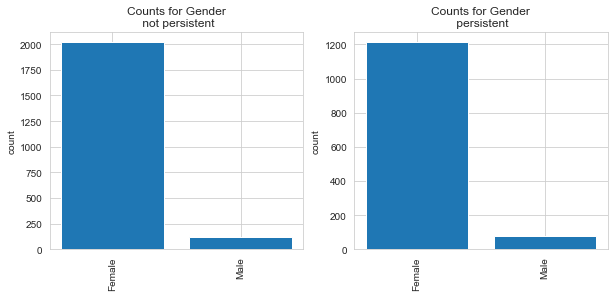

 
Race
 


,Persistency_Flag,Race,dummy
0,Non-Persistent,African American,65
1,Non-Persistent,Asian,43
2,Non-Persistent,Caucasian,1963
3,Non-Persistent,Other/Unknown,64
4,Persistent,African American,30
5,Persistent,Asian,41
6,Persistent,Caucasian,1185
7,Persistent,Other/Unknown,33


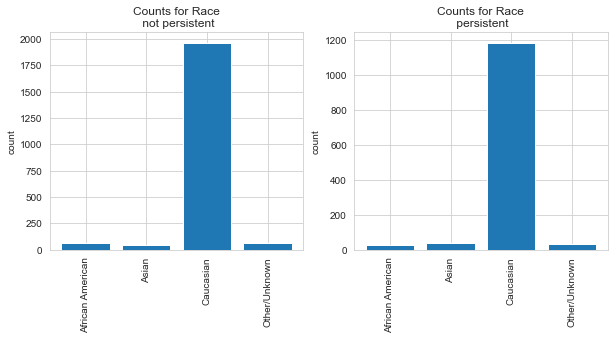

 
Ethnicity
 


,Persistency_Flag,Ethnicity,dummy
0,Non-Persistent,Hispanic,66
1,Non-Persistent,Not Hispanic,2008
2,Non-Persistent,Unknown,61
3,Persistent,Hispanic,32
4,Persistent,Not Hispanic,1227
5,Persistent,Unknown,30


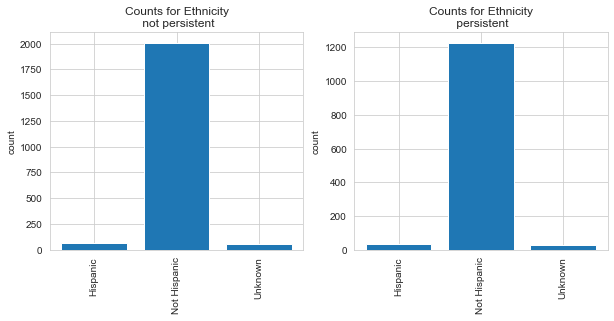

 
Region
 


,Persistency_Flag,Region,dummy
0,Non-Persistent,Midwest,934
1,Non-Persistent,Northeast,134
2,Non-Persistent,Other/Unknown,35
3,Non-Persistent,South,753
4,Non-Persistent,West,279
5,Persistent,Midwest,449
6,Persistent,Northeast,98
7,Persistent,Other/Unknown,25
8,Persistent,South,494
9,Persistent,West,223


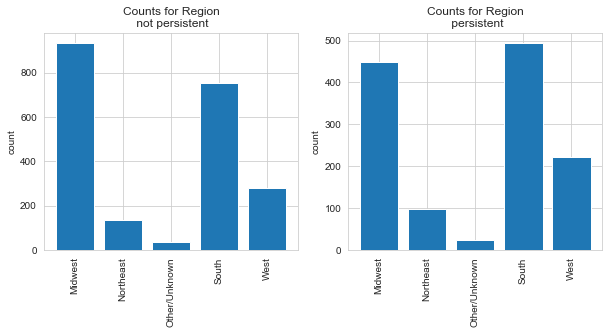

 
Age_Bucket
 


,Persistency_Flag,Age_Bucket,dummy
0,Non-Persistent,55-65,472
1,Non-Persistent,65-75,653
2,Non-Persistent,<55,103
3,Non-Persistent,>75,907
4,Persistent,55-65,261
5,Persistent,65-75,433
6,Persistent,<55,63
7,Persistent,>75,532


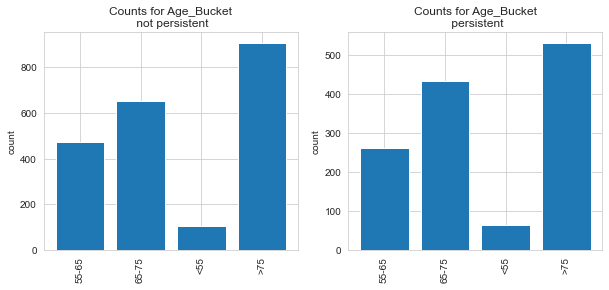

 
Ntm_Speciality
 


,Persistency_Flag,Ntm_Speciality,dummy
0,Non-Persistent,CARDIOLOGY,22
1,Non-Persistent,CLINICAL NURSE SPECIALIST,1
2,Non-Persistent,EMERGENCY MEDICINE,1
3,Non-Persistent,ENDOCRINOLOGY,231
4,Non-Persistent,GASTROENTEROLOGY,2
5,Non-Persistent,GENERAL PRACTITIONER,1041
6,Non-Persistent,GERIATRIC MEDICINE,2
7,Non-Persistent,HEMATOLOGY & ONCOLOGY,8
8,Non-Persistent,HOSPICE AND PALLIATIVE MEDICINE,1
9,Non-Persistent,HOSPITAL MEDICINE,1


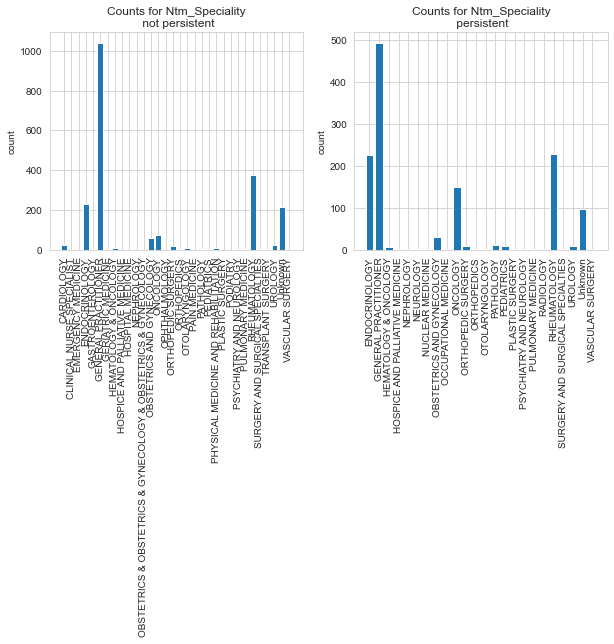

 
Ntm_Specialist_Flag
 


,Persistency_Flag,Ntm_Specialist_Flag,dummy
0,Non-Persistent,Others,1369
1,Non-Persistent,Specialist,766
2,Persistent,Others,644
3,Persistent,Specialist,645


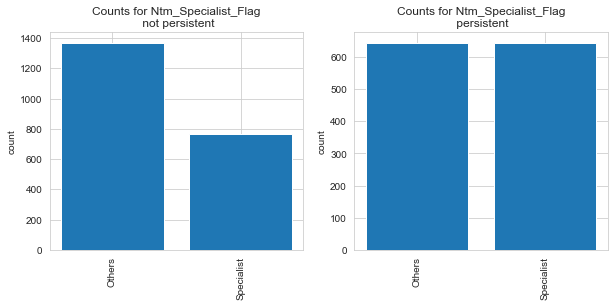

 
Ntm_Speciality_Bucket
 


,Persistency_Flag,Ntm_Speciality_Bucket,dummy
0,Non-Persistent,Endo/Onc/Uro,330
1,Non-Persistent,OB/GYN/Others/PCP/Unknown,1429
2,Non-Persistent,Rheum,376
3,Persistent,Endo/Onc/Uro,386
4,Persistent,OB/GYN/Others/PCP/Unknown,675
5,Persistent,Rheum,228


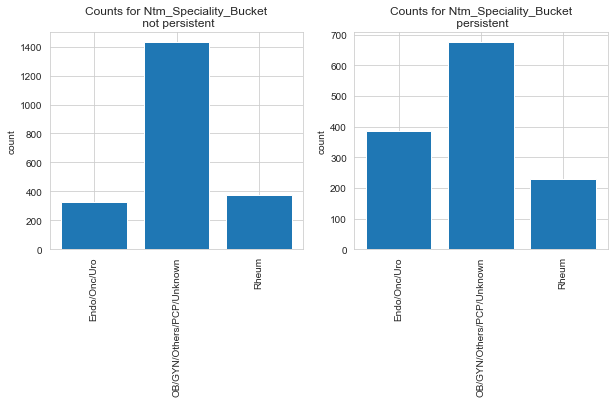

 
Gluco_Record_Prior_Ntm
 


,Persistency_Flag,Gluco_Record_Prior_Ntm,dummy
0,Non-Persistent,N,1629
1,Non-Persistent,Y,506
2,Persistent,N,990
3,Persistent,Y,299


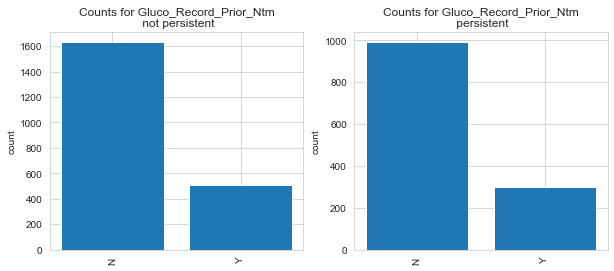

 
Gluco_Record_During_Rx
 


,Persistency_Flag,Gluco_Record_During_Rx,dummy
0,Non-Persistent,N,1728
1,Non-Persistent,Y,407
2,Persistent,N,794
3,Persistent,Y,495


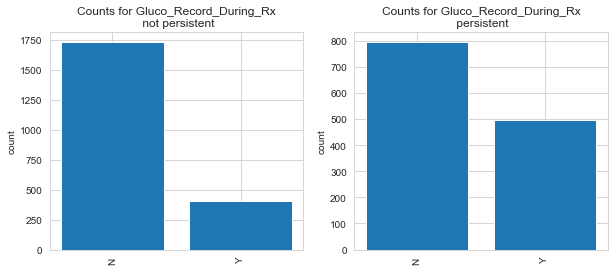

 
Dexa_During_Rx
 


,Persistency_Flag,Dexa_During_Rx,dummy
0,Non-Persistent,N,1915
1,Non-Persistent,Y,220
2,Persistent,N,573
3,Persistent,Y,716


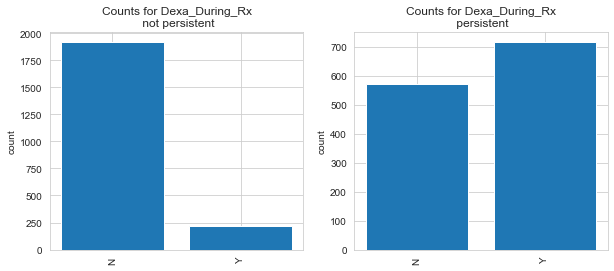

 
Frag_Frac_Prior_Ntm
 


,Persistency_Flag,Frag_Frac_Prior_Ntm,dummy
0,Non-Persistent,N,1791
1,Non-Persistent,Y,344
2,Persistent,N,1081
3,Persistent,Y,208


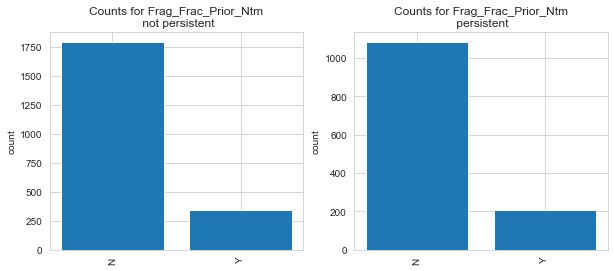

 
Frag_Frac_During_Rx
 


,Persistency_Flag,Frag_Frac_During_Rx,dummy
0,Non-Persistent,N,1933
1,Non-Persistent,Y,202
2,Persistent,N,1074
3,Persistent,Y,215


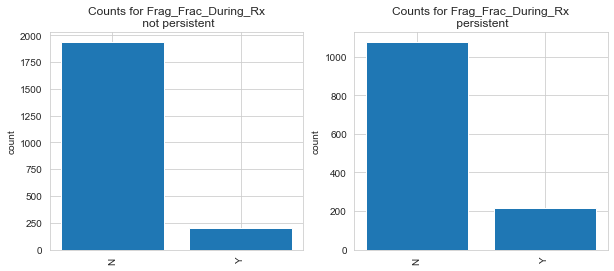

 
Risk_Segment_Prior_Ntm
 


,Persistency_Flag,Risk_Segment_Prior_Ntm,dummy
0,Non-Persistent,HR_VHR,941
1,Non-Persistent,VLR_LR,1194
2,Persistent,HR_VHR,552
3,Persistent,VLR_LR,737


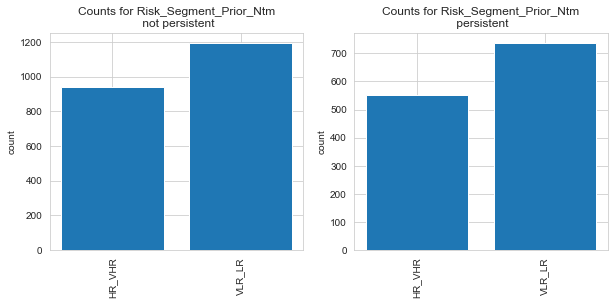

 
Tscore_Bucket_Prior_Ntm
 


,Persistency_Flag,Tscore_Bucket_Prior_Ntm,dummy
0,Non-Persistent,<=-2.5,934
1,Non-Persistent,>-2.5,1201
2,Persistent,<=-2.5,539
3,Persistent,>-2.5,750


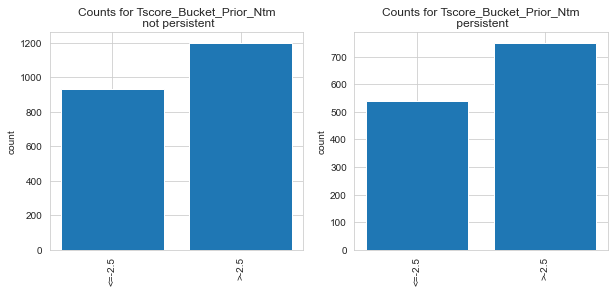

 
Risk_Segment_During_Rx
 


,Persistency_Flag,Risk_Segment_During_Rx,dummy
0,Non-Persistent,HR_VHR,527
1,Non-Persistent,Unknown,1082
2,Non-Persistent,VLR_LR,526
3,Persistent,HR_VHR,438
4,Persistent,Unknown,415
5,Persistent,VLR_LR,436


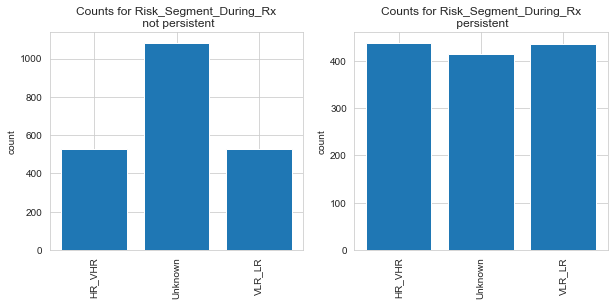

 
Tscore_Bucket_During_Rx
 


,Persistency_Flag,Tscore_Bucket_During_Rx,dummy
0,Non-Persistent,<=-2.5,570
1,Non-Persistent,>-2.5,483
2,Non-Persistent,Unknown,1082
3,Persistent,<=-2.5,447
4,Persistent,>-2.5,427
5,Persistent,Unknown,415


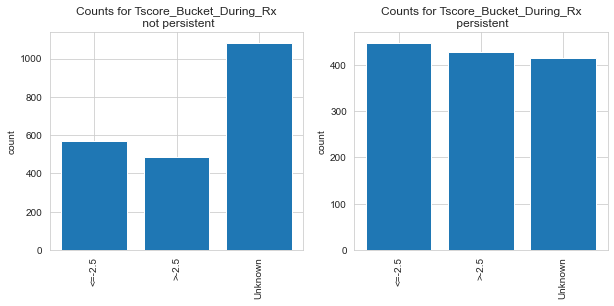

 
Change_T_Score
 


,Persistency_Flag,Change_T_Score,dummy
0,Non-Persistent,Improved,28
1,Non-Persistent,No change,959
2,Non-Persistent,Unknown,1082
3,Non-Persistent,Worsened,66
4,Persistent,Improved,66
5,Persistent,No change,701
6,Persistent,Unknown,415
7,Persistent,Worsened,107


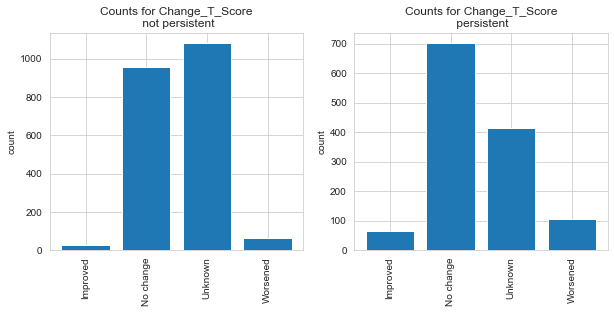

 
Change_Risk_Segment
 


,Persistency_Flag,Change_Risk_Segment,dummy
0,Non-Persistent,Improved,9
1,Non-Persistent,No change,621
2,Non-Persistent,Unknown,1457
3,Non-Persistent,Worsened,48
4,Persistent,Improved,13
5,Persistent,No change,431
6,Persistent,Unknown,772
7,Persistent,Worsened,73


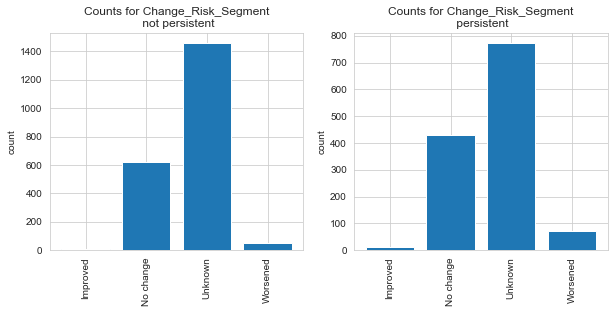

 
Adherent_Flag
 


,Persistency_Flag,Adherent_Flag,dummy
0,Non-Persistent,Adherent,2068
1,Non-Persistent,Non-Adherent,67
2,Persistent,Adherent,1183
3,Persistent,Non-Adherent,106


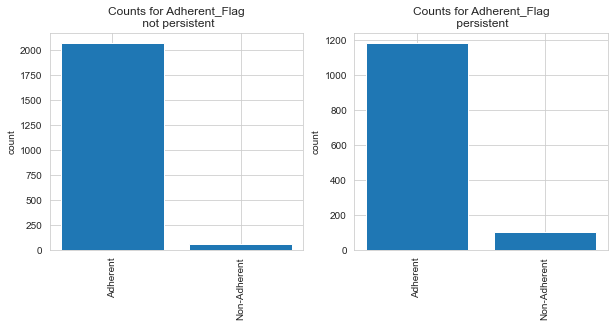

 
Idn_Indicator
 


,Persistency_Flag,Idn_Indicator,dummy
0,Non-Persistent,N,621
1,Non-Persistent,Y,1514
2,Persistent,N,246
3,Persistent,Y,1043


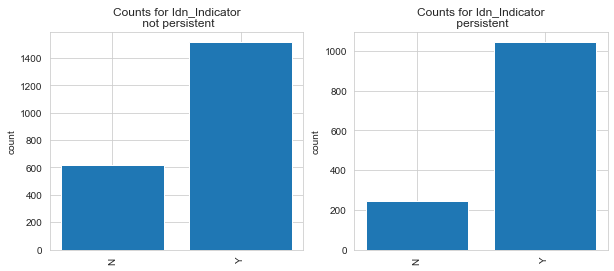

 
Injectable_Experience_During_Rx
 


,Persistency_Flag,Injectable_Experience_During_Rx,dummy
0,Non-Persistent,N,280
1,Non-Persistent,Y,1855
2,Persistent,N,88
3,Persistent,Y,1201


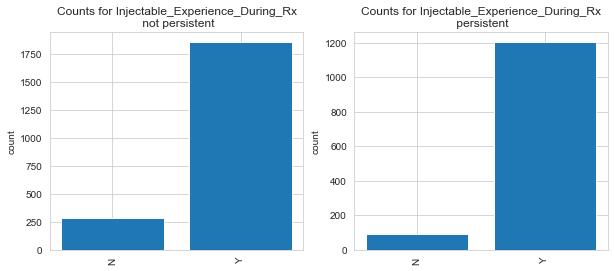

 
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms
 


,Persistency_Flag,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,dummy
0,Non-Persistent,N,1445
1,Non-Persistent,Y,690
2,Persistent,N,446
3,Persistent,Y,843


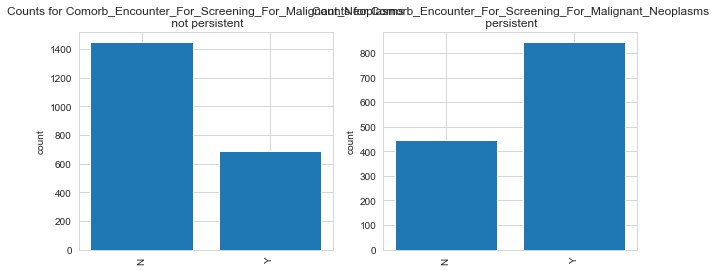

 
Comorb_Encounter_For_Immunization
 


,Persistency_Flag,Comorb_Encounter_For_Immunization,dummy
0,Non-Persistent,N,1451
1,Non-Persistent,Y,684
2,Persistent,N,460
3,Persistent,Y,829


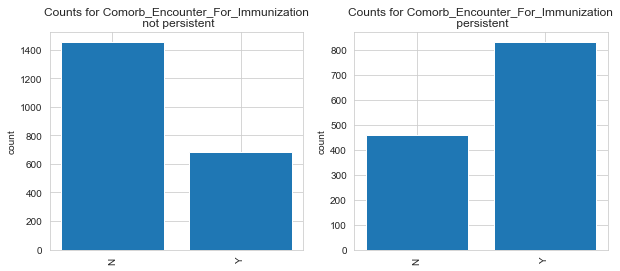

 
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx
 


,Persistency_Flag,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",dummy
0,Non-Persistent,N,1527
1,Non-Persistent,Y,608
2,Persistent,N,545
3,Persistent,Y,744


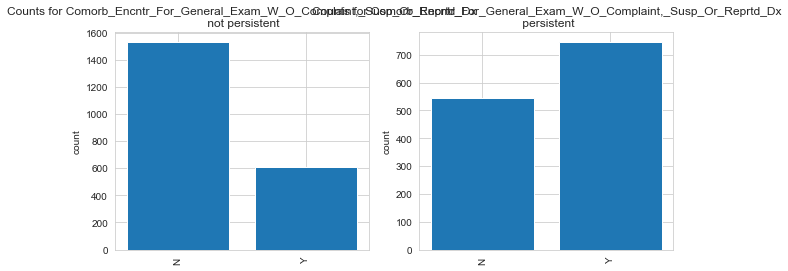

 
Comorb_Vitamin_D_Deficiency
 


,Persistency_Flag,Comorb_Vitamin_D_Deficiency,dummy
0,Non-Persistent,N,1587
1,Non-Persistent,Y,548
2,Persistent,N,744
3,Persistent,Y,545


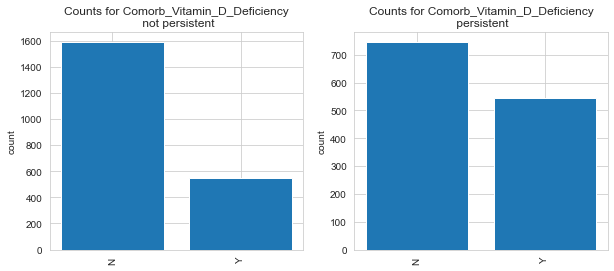

 
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified
 


,Persistency_Flag,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,dummy
0,Non-Persistent,N,1688
1,Non-Persistent,Y,447
2,Persistent,N,737
3,Persistent,Y,552


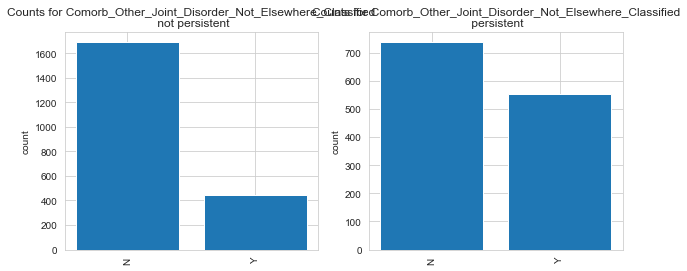

 
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx
 


,Persistency_Flag,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,dummy
0,Non-Persistent,N,1791
1,Non-Persistent,Y,344
2,Persistent,N,842
3,Persistent,Y,447


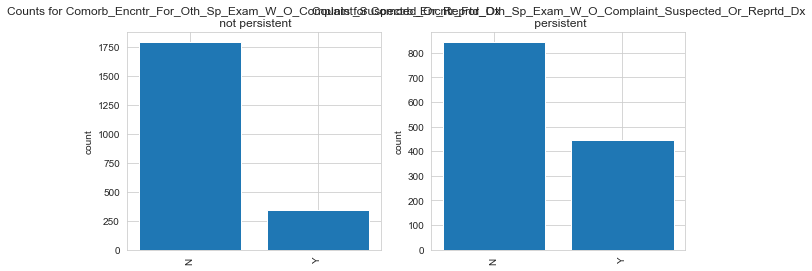

 
Comorb_Long_Term_Current_Drug_Therapy
 


,Persistency_Flag,Comorb_Long_Term_Current_Drug_Therapy,dummy
0,Non-Persistent,N,1875
1,Non-Persistent,Y,260
2,Persistent,N,732
3,Persistent,Y,557


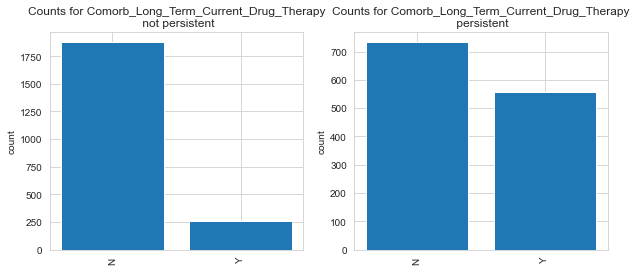

 
Comorb_Dorsalgia
 


,Persistency_Flag,Comorb_Dorsalgia,dummy
0,Non-Persistent,N,1799
1,Non-Persistent,Y,336
2,Persistent,N,846
3,Persistent,Y,443


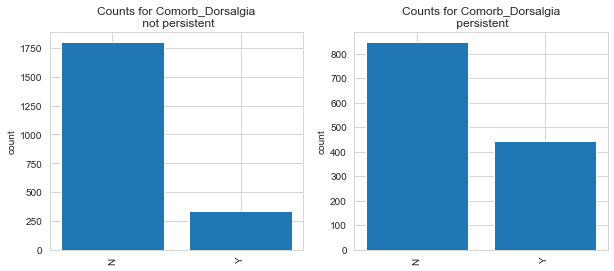

 
Comorb_Personal_History_Of_Other_Diseases_And_Conditions
 


,Persistency_Flag,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,dummy
0,Non-Persistent,N,1858
1,Non-Persistent,Y,277
2,Persistent,N,889
3,Persistent,Y,400


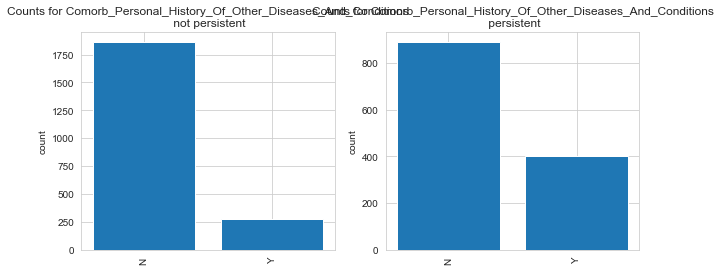

 
Comorb_Other_Disorders_Of_Bone_Density_And_Structure
 


,Persistency_Flag,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,dummy
0,Non-Persistent,N,1959
1,Non-Persistent,Y,176
2,Persistent,N,947
3,Persistent,Y,342


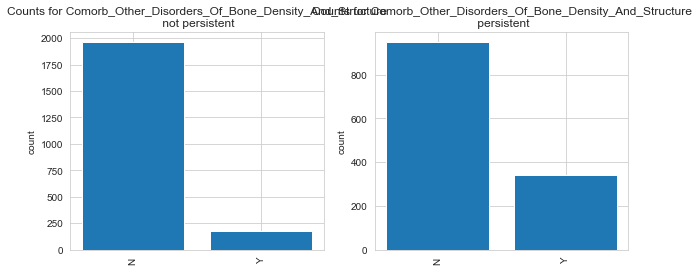

 
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias
 


,Persistency_Flag,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,dummy
0,Non-Persistent,N,1170
1,Non-Persistent,Y,965
2,Persistent,N,489
3,Persistent,Y,800


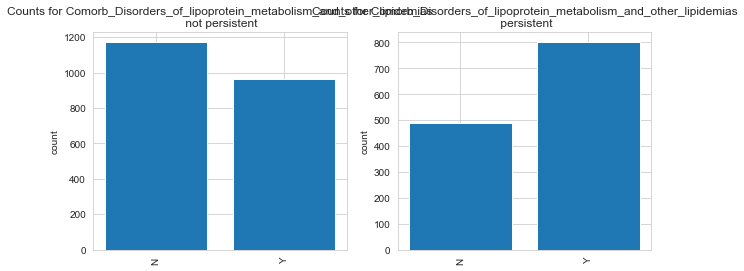

 
Comorb_Osteoporosis_without_current_pathological_fracture
 


,Persistency_Flag,Comorb_Osteoporosis_without_current_pathological_fracture,dummy
0,Non-Persistent,N,1666
1,Non-Persistent,Y,469
2,Persistent,N,841
3,Persistent,Y,448


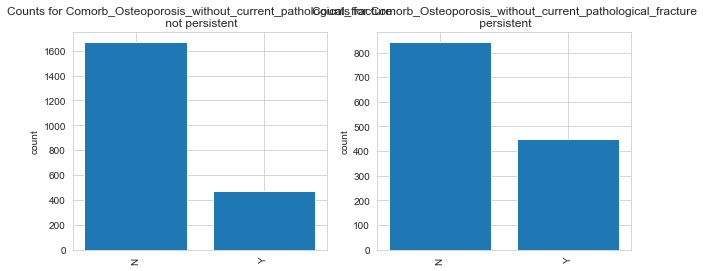

 
Comorb_Personal_history_of_malignant_neoplasm
 


,Persistency_Flag,Comorb_Personal_history_of_malignant_neoplasm,dummy
0,Non-Persistent,N,1844
1,Non-Persistent,Y,291
2,Persistent,N,931
3,Persistent,Y,358


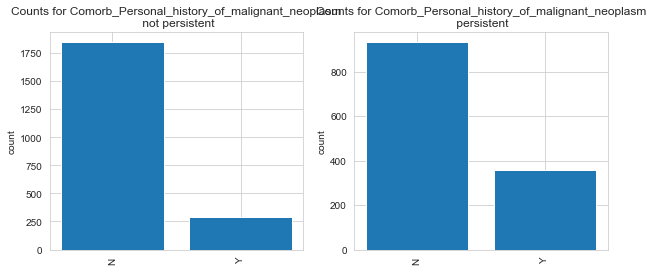

 
Comorb_Gastro_esophageal_reflux_disease
 


,Persistency_Flag,Comorb_Gastro_esophageal_reflux_disease,dummy
0,Non-Persistent,N,1884
1,Non-Persistent,Y,251
2,Persistent,N,910
3,Persistent,Y,379


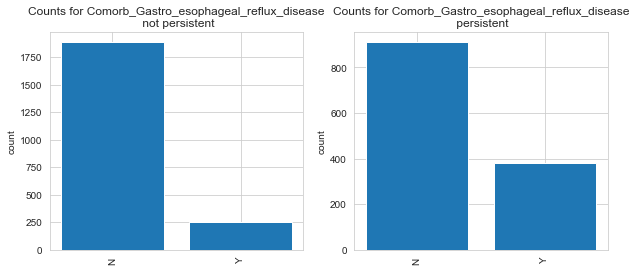

 
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations
 


,Persistency_Flag,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,dummy
0,Non-Persistent,N,1497
1,Non-Persistent,Y,638
2,Persistent,N,745
3,Persistent,Y,544


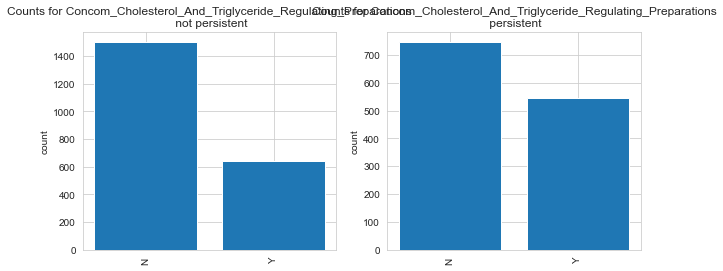

 
Concom_Narcotics
 


,Persistency_Flag,Concom_Narcotics,dummy
0,Non-Persistent,N,1519
1,Non-Persistent,Y,616
2,Persistent,N,672
3,Persistent,Y,617


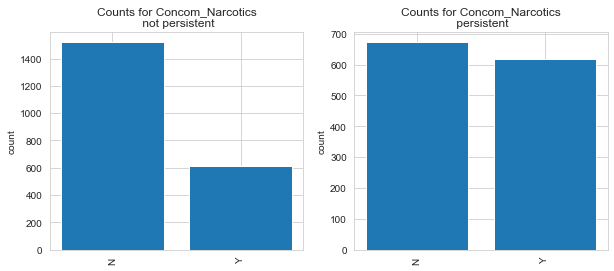

 
Concom_Systemic_Corticosteroids_Plain
 


,Persistency_Flag,Concom_Systemic_Corticosteroids_Plain,dummy
0,Non-Persistent,N,1710
1,Non-Persistent,Y,425
2,Persistent,N,741
3,Persistent,Y,548


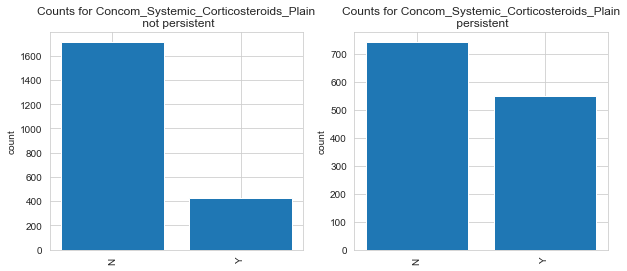

 
Concom_Anti_Depressants_And_Mood_Stabilisers
 


,Persistency_Flag,Concom_Anti_Depressants_And_Mood_Stabilisers,dummy
0,Non-Persistent,N,1619
1,Non-Persistent,Y,516
2,Persistent,N,846
3,Persistent,Y,443


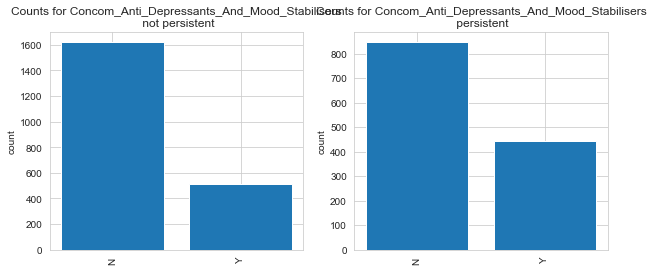

 
Concom_Fluoroquinolones
 


,Persistency_Flag,Concom_Fluoroquinolones,dummy
0,Non-Persistent,N,1858
1,Non-Persistent,Y,277
2,Persistent,N,929
3,Persistent,Y,360


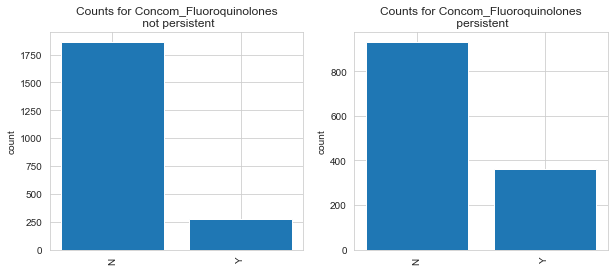

 
Concom_Cephalosporins
 


,Persistency_Flag,Concom_Cephalosporins,dummy
0,Non-Persistent,N,1899
1,Non-Persistent,Y,236
2,Persistent,N,922
3,Persistent,Y,367


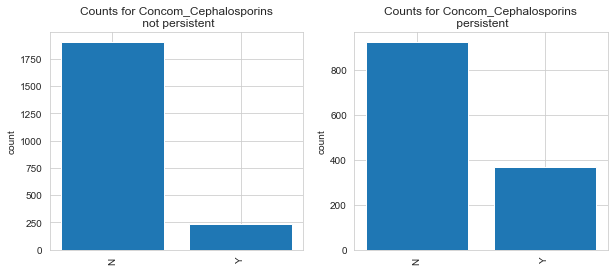

 
Concom_Macrolides_And_Similar_Types
 


,Persistency_Flag,Concom_Macrolides_And_Similar_Types,dummy
0,Non-Persistent,N,1916
1,Non-Persistent,Y,219
2,Persistent,N,937
3,Persistent,Y,352


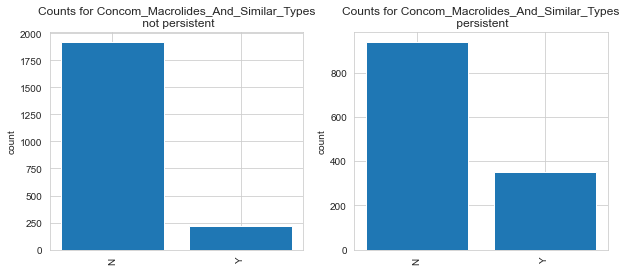

 
Concom_Broad_Spectrum_Penicillins
 


,Persistency_Flag,Concom_Broad_Spectrum_Penicillins,dummy
0,Non-Persistent,N,1971
1,Non-Persistent,Y,164
2,Persistent,N,1014
3,Persistent,Y,275


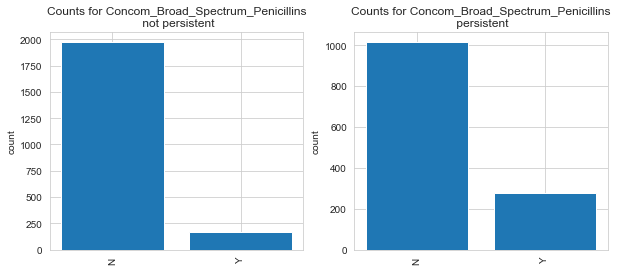

 
Concom_Anaesthetics_General
 


,Persistency_Flag,Concom_Anaesthetics_General,dummy
0,Non-Persistent,N,1955
1,Non-Persistent,Y,180
2,Persistent,N,972
3,Persistent,Y,317


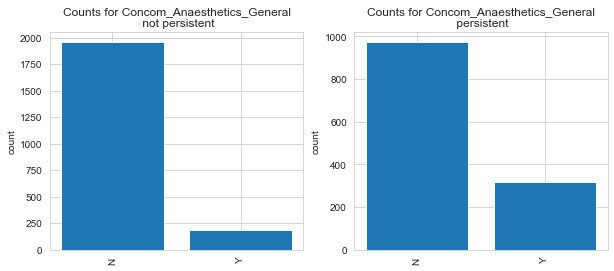

 
Concom_Viral_Vaccines
 


,Persistency_Flag,Concom_Viral_Vaccines,dummy
0,Non-Persistent,N,2027
1,Non-Persistent,Y,108
2,Persistent,N,1044
3,Persistent,Y,245


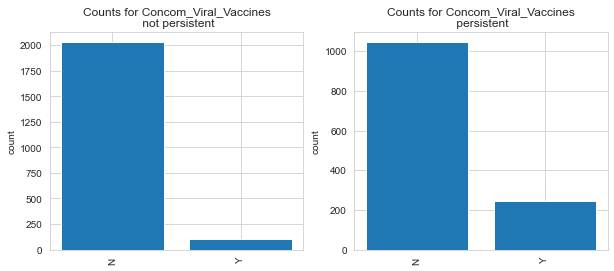

 
Risk_Type_1_Insulin_Dependent_Diabetes
 


,Persistency_Flag,Risk_Type_1_Insulin_Dependent_Diabetes,dummy
0,Non-Persistent,N,2042
1,Non-Persistent,Y,93
2,Persistent,N,1243
3,Persistent,Y,46


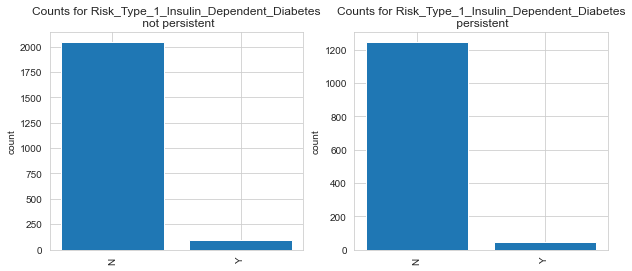

 
Risk_Osteogenesis_Imperfecta
 


,Persistency_Flag,Risk_Osteogenesis_Imperfecta,dummy
0,Non-Persistent,N,2133
1,Non-Persistent,Y,2
2,Persistent,N,1288
3,Persistent,Y,1


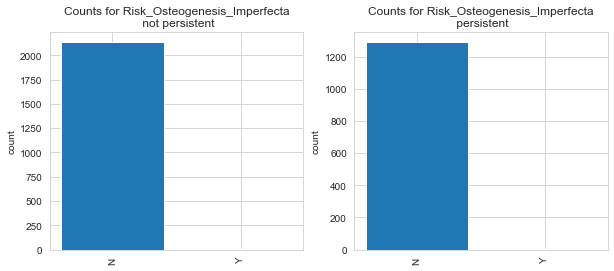

 
Risk_Rheumatoid_Arthritis
 


,Persistency_Flag,Risk_Rheumatoid_Arthritis,dummy
0,Non-Persistent,N,2071
1,Non-Persistent,Y,64
2,Persistent,N,1223
3,Persistent,Y,66


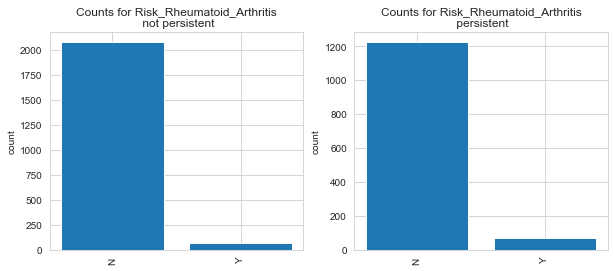

 
Risk_Untreated_Chronic_Hyperthyroidism
 


,Persistency_Flag,Risk_Untreated_Chronic_Hyperthyroidism,dummy
0,Non-Persistent,N,2133
1,Non-Persistent,Y,2
2,Persistent,N,1289


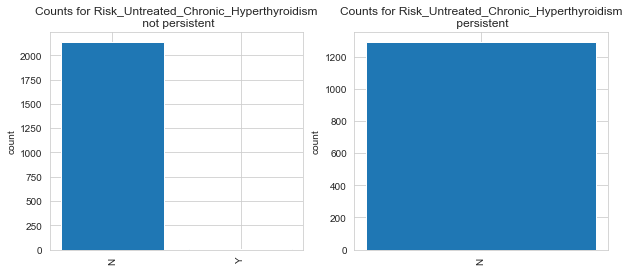

 
Risk_Untreated_Chronic_Hypogonadism
 


,Persistency_Flag,Risk_Untreated_Chronic_Hypogonadism,dummy
0,Non-Persistent,N,2077
1,Non-Persistent,Y,58
2,Persistent,N,1220
3,Persistent,Y,69


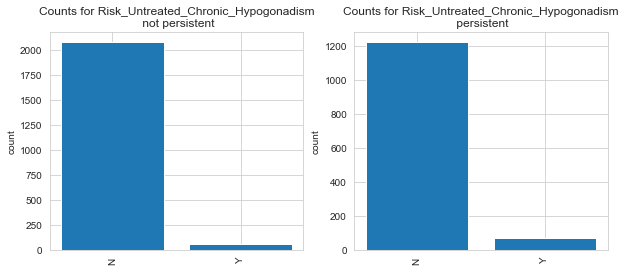

 
Risk_Untreated_Early_Menopause
 


,Persistency_Flag,Risk_Untreated_Early_Menopause,dummy
0,Non-Persistent,N,2127
1,Non-Persistent,Y,8
2,Persistent,N,1285
3,Persistent,Y,4


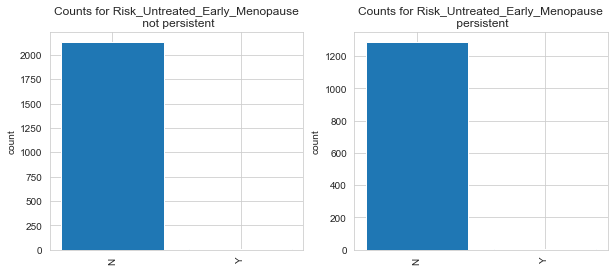

 
Risk_Patient_Parent_Fractured_Their_Hip
 


,Persistency_Flag,Risk_Patient_Parent_Fractured_Their_Hip,dummy
0,Non-Persistent,N,1979
1,Non-Persistent,Y,156
2,Persistent,N,1189
3,Persistent,Y,100


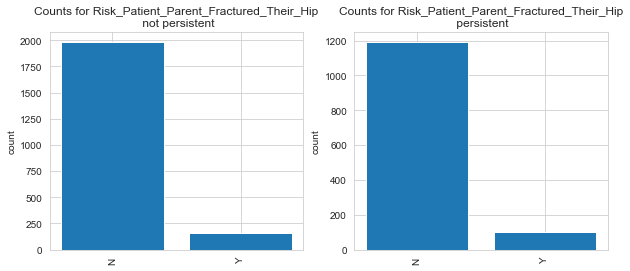

 
Risk_Smoking_Tobacco
 


,Persistency_Flag,Risk_Smoking_Tobacco,dummy
0,Non-Persistent,N,1797
1,Non-Persistent,Y,338
2,Persistent,N,983
3,Persistent,Y,306


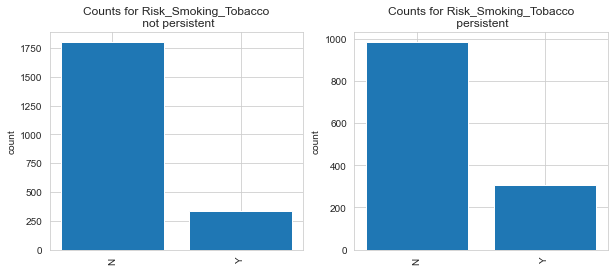

 
Risk_Chronic_Malnutrition_Or_Malabsorption
 


,Persistency_Flag,Risk_Chronic_Malnutrition_Or_Malabsorption,dummy
0,Non-Persistent,N,1870
1,Non-Persistent,Y,265
2,Persistent,N,1084
3,Persistent,Y,205


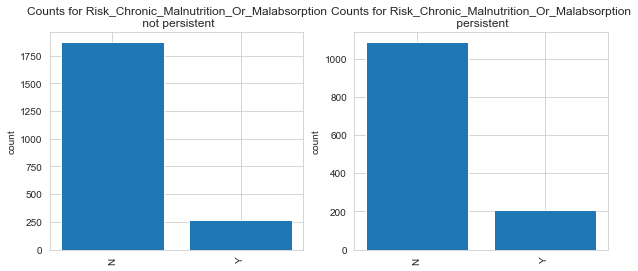

 
Risk_Chronic_Liver_Disease
 


,Persistency_Flag,Risk_Chronic_Liver_Disease,dummy
0,Non-Persistent,N,2126
1,Non-Persistent,Y,9
2,Persistent,N,1280
3,Persistent,Y,9


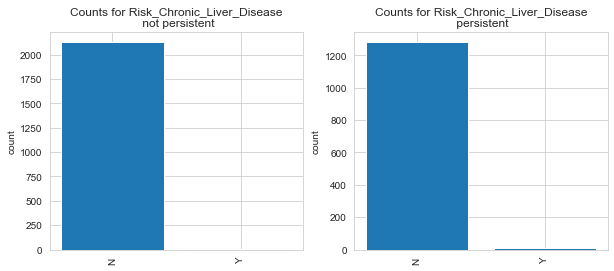

 
Risk_Family_History_Of_Osteoporosis
 


,Persistency_Flag,Risk_Family_History_Of_Osteoporosis,dummy
0,Non-Persistent,N,1910
1,Non-Persistent,Y,225
2,Persistent,N,1156
3,Persistent,Y,133


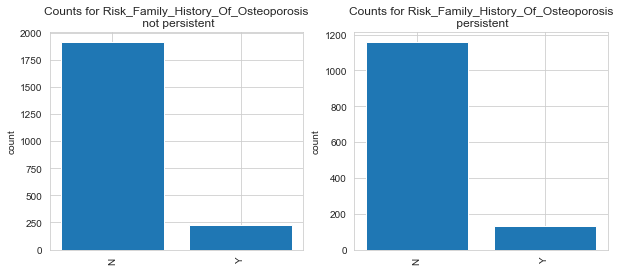

 
Risk_Low_Calcium_Intake
 


,Persistency_Flag,Risk_Low_Calcium_Intake,dummy
0,Non-Persistent,N,2107
1,Non-Persistent,Y,28
2,Persistent,N,1275
3,Persistent,Y,14


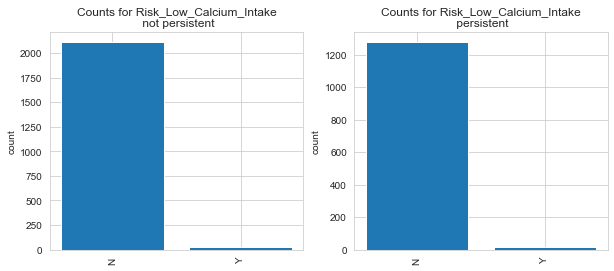

 
Risk_Vitamin_D_Insufficiency
 


,Persistency_Flag,Risk_Vitamin_D_Insufficiency,dummy
0,Non-Persistent,N,1181
1,Non-Persistent,Y,954
2,Persistent,N,607
3,Persistent,Y,682


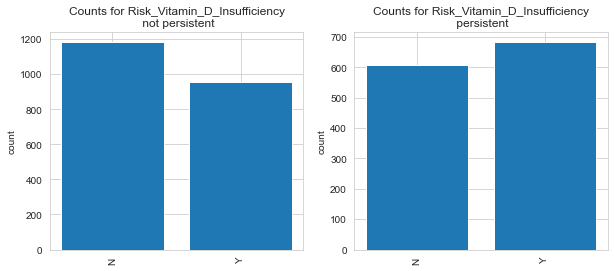

 
Risk_Poor_Health_Frailty
 


,Persistency_Flag,Risk_Poor_Health_Frailty,dummy
0,Non-Persistent,N,1998
1,Non-Persistent,Y,137
2,Persistent,N,1234
3,Persistent,Y,55


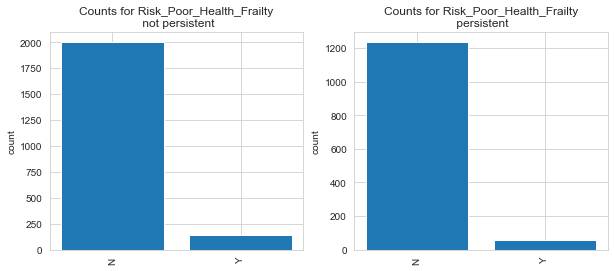

 
Risk_Excessive_Thinness
 


,Persistency_Flag,Risk_Excessive_Thinness,dummy
0,Non-Persistent,N,2084
1,Non-Persistent,Y,51
2,Persistent,N,1273
3,Persistent,Y,16


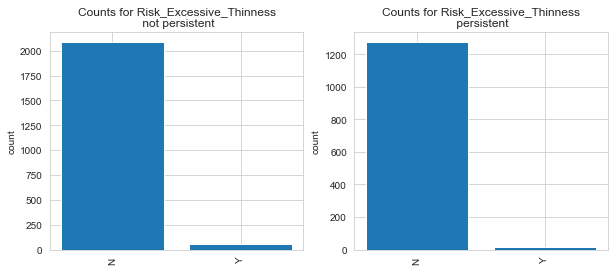

 
Risk_Hysterectomy_Oophorectomy
 


,Persistency_Flag,Risk_Hysterectomy_Oophorectomy,dummy
0,Non-Persistent,N,2098
1,Non-Persistent,Y,37
2,Persistent,N,1272
3,Persistent,Y,17


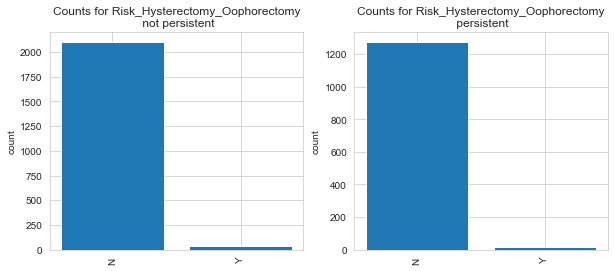

 
Risk_Estrogen_Deficiency
 


,Persistency_Flag,Risk_Estrogen_Deficiency,dummy
0,Non-Persistent,N,2127
1,Non-Persistent,Y,8
2,Persistent,N,1286
3,Persistent,Y,3


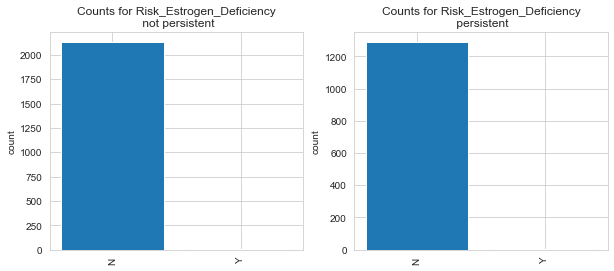

 
Risk_Immobilization
 


,Persistency_Flag,Risk_Immobilization,dummy
0,Non-Persistent,N,2121
1,Non-Persistent,Y,14
2,Persistent,N,1289


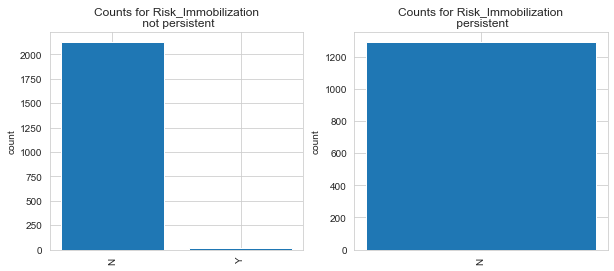

 
Risk_Recurring_Falls
 


,Persistency_Flag,Risk_Recurring_Falls,dummy
0,Non-Persistent,N,2087
1,Non-Persistent,Y,48
2,Persistent,N,1268
3,Persistent,Y,21


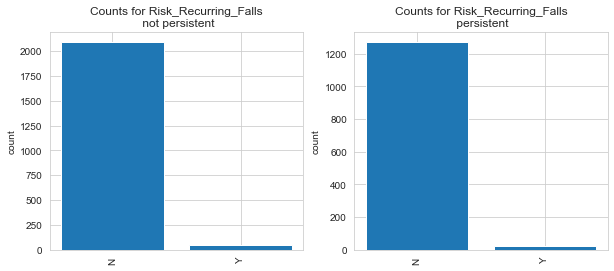

In [25]:
# visualize class separation by categorical features
for col in cat_cols:
    print(' ')
    print(col)
    print(' ')
    counts = df[['dummy', 'Persistency_Flag', col]].groupby(['Persistency_Flag', col], as_index = False).count()
    display(counts)
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp1 = counts[counts['Persistency_Flag'] == 'Non-Persistent'][[col, 'dummy']]
    plt.bar(temp1[col], temp1.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n not persistent')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp2 = counts[counts['Persistency_Flag'] == 'Persistent'][[col, 'dummy']]
    plt.bar(temp2[col], temp2.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n persistent')
    plt.ylabel('count')
    plt.show()

In [26]:
df.Persistency_Flag = (df.Persistency_Flag == 'Persistent').astype(int)#turning target variable to int

In [27]:
df.Persistency_Flag.head()

0    1
1    0
2    0
3    0
4    0
Name: Persistency_Flag, dtype: int32

In [28]:
#getting global mean for those who are persistent
global_persistency = df.Persistency_Flag.mean()
global_persistency

0.3764602803738318

In [29]:
for col in cat_cols:
    print(col)
    df_group = df.groupby(col).Persistency_Flag.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_persistency
    df_group['risk'] = df_group['mean'] / global_persistency
    display(df_group)
    print()
    print()

Gender


,mean,count,diff,risk
Gender,,,,
Female,0.375232,3230,-0.001228,0.996738
Male,0.396907,194,0.020447,1.054314




Race


,mean,count,diff,risk
Race,,,,
African American,0.315789,95,-0.060671,0.838839
Asian,0.488095,84,0.111635,1.296538
Caucasian,0.376429,3148,-0.000031,0.999918
Other/Unknown,0.340206,97,-0.036254,0.903697




Ethnicity


,mean,count,diff,risk
Ethnicity,,,,
Hispanic,0.326531,98,-0.049930,0.867371
Not Hispanic,0.379289,3235,0.002829,1.007514
Unknown,0.329670,91,-0.046790,0.875711




Region


,mean,count,diff,risk
Region,,,,
Midwest,0.324657,1383,-0.051804,0.862393
Northeast,0.422414,232,0.045954,1.122067
Other/Unknown,0.416667,60,0.040206,1.106801
South,0.396151,1247,0.019690,1.052304
West,0.444223,502,0.067763,1.180000




Age_Bucket


,mean,count,diff,risk
Age_Bucket,,,,
55-65,0.356071,733,-0.020389,0.945839
65-75,0.398711,1086,0.022251,1.059105
<55,0.379518,166,0.003058,1.008122
>75,0.369701,1439,-0.006759,0.982046




Ntm_Speciality


,mean,count,diff,risk
Ntm_Speciality,,,,
CARDIOLOGY,0.000000,22,-0.376460,0.000000
CLINICAL NURSE SPECIALIST,0.000000,1,-0.376460,0.000000
EMERGENCY MEDICINE,0.000000,1,-0.376460,0.000000
ENDOCRINOLOGY,0.495633,458,0.119173,1.316562
GASTROENTEROLOGY,0.000000,2,-0.376460,0.000000
GENERAL PRACTITIONER,0.321824,1535,-0.054636,0.854869
GERIATRIC MEDICINE,0.000000,2,-0.376460,0.000000
HEMATOLOGY & ONCOLOGY,0.428571,14,0.052111,1.138424
HOSPICE AND PALLIATIVE MEDICINE,0.500000,2,0.123540,1.328161




Ntm_Specialist_Flag


,mean,count,diff,risk
Ntm_Specialist_Flag,,,,
Others,0.319921,2013,-0.056540,0.849812
Specialist,0.457123,1411,0.080662,1.214265




Ntm_Speciality_Bucket


,mean,count,diff,risk
Ntm_Speciality_Bucket,,,,
Endo/Onc/Uro,0.539106,716,0.162646,1.432040
OB/GYN/Others/PCP/Unknown,0.320817,2104,-0.055643,0.852195
Rheum,0.377483,604,0.001023,1.002718




Gluco_Record_Prior_Ntm


,mean,count,diff,risk
Gluco_Record_Prior_Ntm,,,,
N,0.378007,2619,0.001547,1.004108
Y,0.371429,805,-0.005032,0.986634




Gluco_Record_During_Rx


,mean,count,diff,risk
Gluco_Record_During_Rx,,,,
N,0.31483,2522,-0.061631,0.836289
Y,0.54878,902,0.172320,1.457738




Dexa_During_Rx


,mean,count,diff,risk
Dexa_During_Rx,,,,
N,0.230305,2488,-0.146155,0.611766
Y,0.764957,936,0.388497,2.031973




Frag_Frac_Prior_Ntm


,mean,count,diff,risk
Frag_Frac_Prior_Ntm,,,,
N,0.376393,2872,-0.000068,0.999821
Y,0.376812,552,0.000351,1.000933




Frag_Frac_During_Rx


,mean,count,diff,risk
Frag_Frac_During_Rx,,,,
N,0.357167,3007,-0.019294,0.948750
Y,0.515588,417,0.139127,1.369567




Risk_Segment_Prior_Ntm


,mean,count,diff,risk
Risk_Segment_Prior_Ntm,,,,
HR_VHR,0.369725,1493,-0.006735,0.982110
VLR_LR,0.381668,1931,0.005207,1.013832




Tscore_Bucket_Prior_Ntm


,mean,count,diff,risk
Tscore_Bucket_Prior_Ntm,,,,
<=-2.5,0.365920,1473,-0.010540,0.972001
>-2.5,0.384418,1951,0.007958,1.021139




Risk_Segment_During_Rx


,mean,count,diff,risk
Risk_Segment_During_Rx,,,,
HR_VHR,0.453886,965,0.077426,1.205668
Unknown,0.277221,1497,-0.099239,0.736389
VLR_LR,0.453222,962,0.076762,1.203905




Tscore_Bucket_During_Rx


,mean,count,diff,risk
Tscore_Bucket_During_Rx,,,,
<=-2.5,0.439528,1017,0.063068,1.167528
>-2.5,0.469231,910,0.092770,1.246428
Unknown,0.277221,1497,-0.099239,0.736389




Change_T_Score


,mean,count,diff,risk
Change_T_Score,,,,
Improved,0.702128,94,0.325667,1.865078
No change,0.422289,1660,0.045829,1.121736
Unknown,0.277221,1497,-0.099239,0.736389
Worsened,0.618497,173,0.242037,1.642928




Change_Risk_Segment


,mean,count,diff,risk
Change_Risk_Segment,,,,
Improved,0.590909,22,0.214449,1.569645
No change,0.409696,1052,0.033236,1.088284
Unknown,0.346344,2229,-0.030117,0.920001
Worsened,0.603306,121,0.226846,1.602575




Adherent_Flag


,mean,count,diff,risk
Adherent_Flag,,,,
Adherent,0.363888,3251,-0.012572,0.966604
Non-Adherent,0.612717,173,0.236256,1.627573




Idn_Indicator


,mean,count,diff,risk
Idn_Indicator,,,,
N,0.283737,867,-0.092723,0.753697
Y,0.407900,2557,0.031440,1.083514




Injectable_Experience_During_Rx


,mean,count,diff,risk
Injectable_Experience_During_Rx,,,,
N,0.239130,368,-0.137330,0.635208
Y,0.392997,3056,0.016537,1.043928




Comorb_Encounter_For_Screening_For_Malignant_Neoplasms


,mean,count,diff,risk
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,,,,
N,0.235854,1891,-0.140606,0.626504
Y,0.549902,1533,0.173442,1.460718




Comorb_Encounter_For_Immunization


,mean,count,diff,risk
Comorb_Encounter_For_Immunization,,,,
N,0.240712,1911,-0.135749,0.639408
Y,0.547918,1513,0.171458,1.455447




Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx


,mean,count,diff,risk
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",,,,
N,0.263031,2072,-0.113429,0.698695
Y,0.550296,1352,0.173836,1.461763




Comorb_Vitamin_D_Deficiency


,mean,count,diff,risk
Comorb_Vitamin_D_Deficiency,,,,
N,0.319176,2331,-0.057284,0.847835
Y,0.498628,1093,0.122167,1.324516




Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified


,mean,count,diff,risk
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,,,,
N,0.303918,2425,-0.072543,0.807303
Y,0.552553,999,0.176092,1.467758




Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx


,mean,count,diff,risk
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,,,,
N,0.319787,2633,-0.056673,0.849458
Y,0.565107,791,0.188647,1.501108




Comorb_Long_Term_Current_Drug_Therapy


,mean,count,diff,risk
Comorb_Long_Term_Current_Drug_Therapy,,,,
N,0.280783,2607,-0.095678,0.745849
Y,0.681763,817,0.305302,1.810981




Comorb_Dorsalgia


,mean,count,diff,risk
Comorb_Dorsalgia,,,,
N,0.319849,2645,-0.056612,0.849622
Y,0.568678,779,0.192218,1.510592




Comorb_Personal_History_Of_Other_Diseases_And_Conditions


,mean,count,diff,risk
Comorb_Personal_History_Of_Other_Diseases_And_Conditions,,,,
N,0.323626,2747,-0.052835,0.859654
Y,0.590842,677,0.214382,1.569467




Comorb_Other_Disorders_Of_Bone_Density_And_Structure


,mean,count,diff,risk
Comorb_Other_Disorders_Of_Bone_Density_And_Structure,,,,
N,0.325877,2906,-0.050583,0.865636
Y,0.660232,518,0.283771,1.753788




Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias


,mean,count,diff,risk
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,,,,
N,0.294756,1659,-0.081704,0.782967
Y,0.453258,1765,0.076798,1.203999




Comorb_Osteoporosis_without_current_pathological_fracture


,mean,count,diff,risk
Comorb_Osteoporosis_without_current_pathological_fracture,,,,
N,0.335461,2507,-0.041000,0.891092
Y,0.488550,917,0.112089,1.297745




Comorb_Personal_history_of_malignant_neoplasm


,mean,count,diff,risk
Comorb_Personal_history_of_malignant_neoplasm,,,,
N,0.335495,2775,-0.040965,0.891184
Y,0.551618,649,0.175158,1.465275




Comorb_Gastro_esophageal_reflux_disease


,mean,count,diff,risk
Comorb_Gastro_esophageal_reflux_disease,,,,
N,0.325698,2794,-0.050762,0.865159
Y,0.601587,630,0.225127,1.598010




Concom_Cholesterol_And_Triglyceride_Regulating_Preparations


,mean,count,diff,risk
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,,,,
N,0.332293,2242,-0.044168,0.882676
Y,0.460237,1182,0.083777,1.222538




Concom_Narcotics


,mean,count,diff,risk
Concom_Narcotics,,,,
N,0.306709,2191,-0.069751,0.814719
Y,0.500406,1233,0.123945,1.329239




Concom_Systemic_Corticosteroids_Plain


,mean,count,diff,risk
Concom_Systemic_Corticosteroids_Plain,,,,
N,0.302326,2451,-0.074135,0.803074
Y,0.563207,973,0.186746,1.496058




Concom_Anti_Depressants_And_Mood_Stabilisers


,mean,count,diff,risk
Concom_Anti_Depressants_And_Mood_Stabilisers,,,,
N,0.343205,2465,-0.033255,0.911663
Y,0.461940,959,0.085479,1.227060




Concom_Fluoroquinolones


,mean,count,diff,risk
Concom_Fluoroquinolones,,,,
N,0.333333,2787,-0.043127,0.885441
Y,0.565149,637,0.188689,1.501218




Concom_Cephalosporins


,mean,count,diff,risk
Concom_Cephalosporins,,,,
N,0.326834,2821,-0.049626,0.868178
Y,0.608624,603,0.232163,1.616701




Concom_Macrolides_And_Similar_Types


,mean,count,diff,risk
Concom_Macrolides_And_Similar_Types,,,,
N,0.328426,2853,-0.048034,0.872406
Y,0.616462,571,0.240002,1.637523




Concom_Broad_Spectrum_Penicillins


,mean,count,diff,risk
Concom_Broad_Spectrum_Penicillins,,,,
N,0.339698,2985,-0.036762,0.902349
Y,0.626424,439,0.249963,1.663983




Concom_Anaesthetics_General


,mean,count,diff,risk
Concom_Anaesthetics_General,,,,
N,0.332081,2927,-0.044380,0.882113
Y,0.637827,497,0.261367,1.694274




Concom_Viral_Vaccines


,mean,count,diff,risk
Concom_Viral_Vaccines,,,,
N,0.339954,3071,-0.036506,0.903029
Y,0.694051,353,0.317591,1.843623




Risk_Type_1_Insulin_Dependent_Diabetes


,mean,count,diff,risk
Risk_Type_1_Insulin_Dependent_Diabetes,,,,
N,0.378387,3285,0.001926,1.005117
Y,0.330935,139,-0.045525,0.879071




Risk_Osteogenesis_Imperfecta


,mean,count,diff,risk
Risk_Osteogenesis_Imperfecta,,,,
N,0.376498,3421,0.000038,1.000100
Y,0.333333,3,-0.043127,0.885441




Risk_Rheumatoid_Arthritis


,mean,count,diff,risk
Risk_Rheumatoid_Arthritis,,,,
N,0.371281,3294,-0.005179,0.986242
Y,0.507692,130,0.131232,1.348595




Risk_Untreated_Chronic_Hyperthyroidism


,mean,count,diff,risk
Risk_Untreated_Chronic_Hyperthyroidism,,,,
N,0.37668,3422,0.00022,1.000584
Y,0.00000,2,-0.37646,0.000000




Risk_Untreated_Chronic_Hypogonadism


,mean,count,diff,risk
Risk_Untreated_Chronic_Hypogonadism,,,,
N,0.370033,3297,-0.006427,0.982928
Y,0.543307,127,0.166847,1.443199




Risk_Untreated_Early_Menopause


,mean,count,diff,risk
Risk_Untreated_Early_Menopause,,,,
N,0.376612,3412,0.000152,1.000403
Y,0.333333,12,-0.043127,0.885441




Risk_Patient_Parent_Fractured_Their_Hip


,mean,count,diff,risk
Risk_Patient_Parent_Fractured_Their_Hip,,,,
N,0.375316,3168,-0.001145,0.996960
Y,0.390625,256,0.014165,1.037626




Risk_Smoking_Tobacco


,mean,count,diff,risk
Risk_Smoking_Tobacco,,,,
N,0.353597,2780,-0.022863,0.939268
Y,0.475155,644,0.098695,1.262166




Risk_Chronic_Malnutrition_Or_Malabsorption


,mean,count,diff,risk
Risk_Chronic_Malnutrition_Or_Malabsorption,,,,
N,0.36696,2954,-0.00950,0.974764
Y,0.43617,470,0.05971,1.158609




Risk_Chronic_Liver_Disease


,mean,count,diff,risk
Risk_Chronic_Liver_Disease,,,,
N,0.375807,3406,-0.000653,0.998266
Y,0.500000,18,0.123540,1.328161




Risk_Family_History_Of_Osteoporosis


,mean,count,diff,risk
Risk_Family_History_Of_Osteoporosis,,,,
N,0.377038,3066,0.000578,1.001536
Y,0.371508,358,-0.004952,0.986846




Risk_Low_Calcium_Intake


,mean,count,diff,risk
Risk_Low_Calcium_Intake,,,,
N,0.376996,3382,0.000536,1.001423
Y,0.333333,42,-0.043127,0.885441




Risk_Vitamin_D_Insufficiency


,mean,count,diff,risk
Risk_Vitamin_D_Insufficiency,,,,
N,0.339485,1788,-0.036975,0.901783
Y,0.416870,1636,0.040410,1.107342




Risk_Poor_Health_Frailty


,mean,count,diff,risk
Risk_Poor_Health_Frailty,,,,
N,0.381807,3232,0.005347,1.014202
Y,0.286458,192,-0.090002,0.760926




Risk_Excessive_Thinness


,mean,count,diff,risk
Risk_Excessive_Thinness,,,,
N,0.379208,3357,0.002747,1.007298
Y,0.238806,67,-0.137654,0.634346




Risk_Hysterectomy_Oophorectomy


,mean,count,diff,risk
Risk_Hysterectomy_Oophorectomy,,,,
N,0.377448,3370,0.000988,1.002624
Y,0.314815,54,-0.061645,0.836250




Risk_Estrogen_Deficiency


,mean,count,diff,risk
Risk_Estrogen_Deficiency,,,,
N,0.376795,3413,0.000334,1.000888
Y,0.272727,11,-0.103733,0.724452




Risk_Immobilization


,mean,count,diff,risk
Risk_Immobilization,,,,
N,0.378006,3410,0.001546,1.004106
Y,0.000000,14,-0.376460,0.000000




Risk_Recurring_Falls


,mean,count,diff,risk
Risk_Recurring_Falls,,,,
N,0.377943,3355,0.001483,1.003940
Y,0.304348,69,-0.072112,0.808446


In [30]:
df_group.head()

,mean,count,diff,risk
Risk_Recurring_Falls,,,,
N,0.377943,3355,0.001483,1.003940
Y,0.304348,69,-0.072112,0.808446


2. Quantitative Analysis

In [31]:
#mutual information scores for the categorical variables
from sklearn.metrics import mutual_info_score
#creating a function
def mutual_info_churn_score(series):
    return mutual_info_score(series, df.Persistency_Flag)

In [32]:
mi = df[cat_cols].apply(mutual_info_churn_score) #getting mutual info scores
pd.set_option('display.max_rows', None) #setting to print all rows
print(mi.sort_values(ascending=False)) #sorting in descending order

Dexa_During_Rx                                                        1.211142e-01
Comorb_Long_Term_Current_Drug_Therapy                                 6.101576e-02
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms                5.251710e-02
Comorb_Encounter_For_Immunization                                     5.002321e-02
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx       4.192601e-02
Comorb_Other_Disorders_Of_Bone_Density_And_Structure                  2.962244e-02
Concom_Systemic_Corticosteroids_Plain                                 2.893331e-02
Ntm_Speciality                                                        2.889942e-02
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified                  2.672267e-02
Concom_Anaesthetics_General                                           2.390212e-02
Concom_Viral_Vaccines                                                 2.389580e-02
Concom_Cephalosporins                                                 2.379594e-02
Conc

In [33]:
#quantitative analysis
#chi square test (test of independence)
#creating a function for chi square test
def chi_square_test(col):
    print('Ho:Persistency is not dependent on '+col)
    print('H1:Persistency is dependent on '+col)
    import scipy.stats as stats #importing stats
    #creating a contigency table
    value_list = df[col].unique().tolist()#creating list of column values
    for value in value_list:
        data_crosstab = pd.crosstab(df['Persistency_Flag']==1,df[col]==value,
                                margins=True, margins_name="Total")
    # significance level
    alpha = 0.05
    # Calcualtion of Chisquare test statistics
    chi_square = 0
    rows = (df['Persistency_Flag']==1).unique()
    columns = (df[col]==value).unique()
    for i in columns:
        for j in rows:
            O = data_crosstab[i][j]
            E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
            chi_square += (O-E)**2/E
    # The p-value approach
    p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
    conclusion = "Failed to reject the null hypothesis."
    if p_value <= alpha:
        conclusion = "Null Hypothesis is rejected."

    print("chisquare-score is:", chi_square, " and p value is:", p_value)
    print(conclusion)

In [34]:
#getting chi square test for the categorical columns
for col in cat_cols:
    print(col)
    chi_square_test(col)
    print(' ')

Gender
Ho:Persistency is not dependent on Gender
H1:Persistency is dependent on Gender
chisquare-score is: 0.36627405732727586  and p value is: 0.7368701543427314
Failed to reject the null hypothesis.
 
Race
Ho:Persistency is not dependent on Race
H1:Persistency is dependent on Race
chisquare-score is: 1.5322153903788895  and p value is: 0.2972884123904047
Failed to reject the null hypothesis.
 
Ethnicity
Ho:Persistency is not dependent on Ethnicity
H1:Persistency is dependent on Ethnicity
chisquare-score is: 0.8718900574262487  and p value is: 0.5509690160747311
Failed to reject the null hypothesis.
 
Region
Ho:Persistency is not dependent on Region
H1:Persistency is dependent on Region
chisquare-score is: 2.238788169323524  and p value is: 0.10771197815803846
Failed to reject the null hypothesis.
 
Age_Bucket
Ho:Persistency is not dependent on Age_Bucket
H1:Persistency is dependent on Age_Bucket
chisquare-score is: 0.006949016381882313  and p value is: 0.8396574453455774
Failed to re

chisquare-score is: 67.03383731536053  and p value is: 0.0
Null Hypothesis is rejected.
 
Comorb_Personal_history_of_malignant_neoplasm
Ho:Persistency is not dependent on Comorb_Personal_history_of_malignant_neoplasm
H1:Persistency is dependent on Comorb_Personal_history_of_malignant_neoplasm
chisquare-score is: 104.66226258586042  and p value is: 0.0
Null Hypothesis is rejected.
 
Comorb_Gastro_esophageal_reflux_disease
Ho:Persistency is not dependent on Comorb_Gastro_esophageal_reflux_disease
H1:Persistency is dependent on Comorb_Gastro_esophageal_reflux_disease
chisquare-score is: 166.69396195337544  and p value is: 0.0
Null Hypothesis is rejected.
 
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations
Ho:Persistency is not dependent on Concom_Cholesterol_And_Triglyceride_Regulating_Preparations
H1:Persistency is dependent on Concom_Cholesterol_And_Triglyceride_Regulating_Preparations
chisquare-score is: 53.9731625607714  and p value is: 0.0
Null Hypothesis is rejected.
 
Con

In [35]:
#correlation of numerical columns with persistency
df[num_cols].corrwith(df.Persistency_Flag)

Dexa_Freq_During_Rx            0.335235
Count_Of_Risks                 0.082210
min_max_Dexa_Freq_During_Rx    0.335235
min_max_Count_Of_Risks         0.082210
sqrt_Dexa_Freq_During_Rx       0.477253
sqrt_Count_Of_Risks            0.083035
log_Dexa_Freq_During_Rx        0.503177
log_Count_Of_Risks             0.083297
dtype: float64

In [36]:
#ANOVA test
#creating a function for the ANOVA test
def ANOVA(df, col='Dexa_Freq_During_Rx'):
    #creating the hypothesis
    print('Ho:Persistency is not positively correlated with ' + col)
    print('H1:Persistency is positively correlated with ' + col)
    df = df[[col, 'Persistency_Flag']]
    persistent = df[col][df['Persistency_Flag']==1]
    persistent = persistent.to_numpy()
    not_persistent = df[col][df['Persistency_Flag']==0]
    not_persistent = not_persistent.to_numpy()
    #one-way ANOVA
    import scipy.stats as stats
    fvalue, pvalue = stats.f_oneway(persistent, not_persistent)
    print('fvalue='+str(fvalue))
    print('pvalue='+str(pvalue))
    if pvalue <= 0.05:
        print('Null hypothesis is rejected')
    else:
        print('Failed to reject the Null hypothesis')
#getting anova test for the numerical columns
for col in num_cols:
    print(col)
    ANOVA(df, col)
    print(' ')

Dexa_Freq_During_Rx
Ho:Persistency is not positively correlated with Dexa_Freq_During_Rx
H1:Persistency is positively correlated with Dexa_Freq_During_Rx
fvalue=433.26319772711224
pvalue=1.0545387804511476e-90
Null hypothesis is rejected
 
Count_Of_Risks
Ho:Persistency is not positively correlated with Count_Of_Risks
H1:Persistency is positively correlated with Count_Of_Risks
fvalue=23.28495367237448
pvalue=1.45792371737467e-06
Null hypothesis is rejected
 
min_max_Dexa_Freq_During_Rx
Ho:Persistency is not positively correlated with min_max_Dexa_Freq_During_Rx
H1:Persistency is positively correlated with min_max_Dexa_Freq_During_Rx
fvalue=433.26319772711224
pvalue=1.0545387804511476e-90
Null hypothesis is rejected
 
min_max_Count_Of_Risks
Ho:Persistency is not positively correlated with min_max_Count_Of_Risks
H1:Persistency is positively correlated with min_max_Count_Of_Risks
fvalue=23.284953672374467
pvalue=1.45792371737467e-06
Null hypothesis is rejected
 
sqrt_Dexa_Freq_During_Rx
Ho